# kütüphane yükle

In [ ]:
import pandas as pd # veriyi excelden almak ve veriyle önişlemler gerçekleşitrmek için kütüphane
!pip install gensim==4.1.2
import gensim # lda'nın olduğu kütüphane
from gensim.utils import simple_preprocess # veriyi lda modelinde kullanmak için önişleme modülü
import gensim.corpora as corpora # veriyi lda modelinde kullanmak için sözlük modülü
import numpy as np # matematiksel işlemler için kütüphane
!pip install wordcloud==1.8.1
from wordcloud import WordCloud # veride geçen en çok kelimeleri görselleştirmek için kelime bulutu kütüphanesi
from collections import Counter # veride geçen kelimeleri saydırmak için kütüphane
!pip install matplotlib
!pip3 install matplotlib --upgrade
import matplotlib.pyplot as plt # grafik oluşturmak için kütüphane
from gensim.models.coherencemodel import CoherenceModel # modeli değerlendirmek için modül
import nltk # türkçe stopwords'leri kullanmak için

from nltk.tokenize import RegexpTokenizer # Cümleleri makine için daha anlaşılır yapmak için bölmek için modül
!pip install pyLDAvis==3.3.1 # LDA'nın kümelediği kümeleri görselleştirme kütüphanesi
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


#veri yükle

In [ ]:
df1 = pd.read_excel('CallToTexNewData.xlsx')
df2 = pd.read_excel('CallToTexNewData1.xlsx')
df3 = pd.read_excel('CallToTexNewData2.xlsx')
df4 = pd.read_excel('CallToTexNewData3.xlsx')
df5 = pd.read_excel('Kayıt Detay2.xlsx')
df = df1.append([df2,df3,df4,df5], ignore_index=True)

# sadece müşteri çağrıları ve ürünlerle çalışağımızdan aşağıdaki veriler verisetinden çıkarılır.
df.drop(columns=['CallId','Kuyruk','AgentText', 'Id','AgentTextTimes','CustomerTextTimes','Type'], inplace=True)
df.drop(df[df['Kuyruk Konusu'] == 'Yeni Ürün Tanıtımı'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Hizmet Takibi Servis Takibi'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Kurumsal Satış'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Kurumsal Satış - Telefon'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'İngilizce Çağrılar'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Memnuniyet Araması'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Uzaktan Erişim'].index, inplace = True)
df.drop(df[df['Kuyruk Konusu'] == 'Çözüm Ekibi'].index, inplace = True)
df.drop(columns=['Kuyruk Konusu'], inplace=True)

df

,CustomerText
2,iyi günler ben bu kampanyaya *****ılırım başar...
4,iyi günler günaydın şey ben bugün gün kaldım d...
5,iyi günler efendim ııı cuma günü de yok herhal...
7,iyi günler benim faruk efendim benim klimam dü...
9,eee iyi çalışmalar ceylan hanım kolay gelsin e...
...,...
25995,barış bey barış beydi değil mi hı başka yıllar...
25996,iyi günler ben telefonumun garantide de oraya ...
25997,teşekkür ederim **** bey kolay gelsin hayırlı ...
25998,evet ç**** merkezinden şikayetçiyim bana açıp ...


# veri önişle

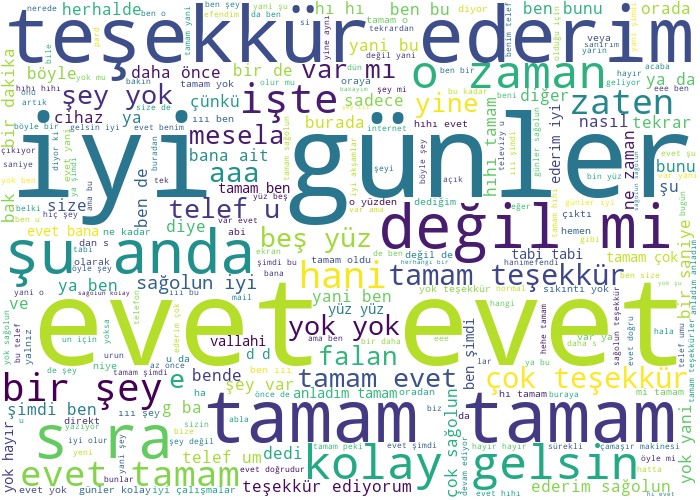

In [ ]:
# kelime bulutu en çok 250 kelime
long_string = ','.join(list(df['CustomerText'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
# Kelimelerdeki yazım yanlışlarını düzeltme
df['CustomerText'] = df['CustomerText'].str.replace(r'birim[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'birim', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'tablet[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tablet', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'telefon[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'televizyon[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'televizyon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'makine[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'makine', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'şifre[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'şifre', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ekran[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ekran', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'garanti[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'garanti', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ar\u0131za[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'arıza', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r's\u00fcp\u00fcrge[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'süpürge', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'siz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'siz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'do\u011fru[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'doğru', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'gel[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'gel', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'gir[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'gir', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'tamam[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tamam', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'biz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'biz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ben[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ben', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ses[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ses', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ayar[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'uygulama[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'uygulama', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'numara[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'numara', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'bey[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bey', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'bilgisayar[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'buzdola[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'buzdolap', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ankast[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'ankastre', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'davlumbaz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'davlumbaz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'f\u0131r\u0131n[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'fırın', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mikrodalga[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mikro dalga', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mikrodalga', 'mikro dalga', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mikro dalga[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mikro dalga', regex=True)

df['CustomerText'] = df['CustomerText'].str.replace(r'set \u00fcst\u00fc[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'set üstü', regex=True)

df['CustomerText'] = df['CustomerText'].str.replace(r'bozu[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'arıza', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'buz dola[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'buzdolap', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'buluray[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bluray', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'eniks[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'nx', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'enx[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'nx', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'enix[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'nx', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'klima[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'klima', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'diz\u00fcst\u00fc[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'diz \u00fcst\u00fc[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'laptop[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'notebook[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'faks[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'faks', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'yaz\u0131c\u0131[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'yazıcı', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'taray\u0131c\u0131[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tarayıcı', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\u00e7amas\u0131r[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'çamaşır', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'kurutma[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'kurutma', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'makina[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'makine', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'telekom[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'telekom', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\u015fikayet[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'şikayet', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'cihaz[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'cihaz', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bara[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'arama', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'internet[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'internet', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mesaj[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mesaj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btel\b', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btelef\b', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'mobil[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'mobil', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btel\b', 'telefon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'bula\u015f\u0131k[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'bulaşık', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'sistem[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'sistem', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bpc\b', 'bilgisayar', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'ses sistem', 'ev sinema sistem', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'sinema sistem', 'ev sinema sistem', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bkayd', 'kayıt', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btv\'[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'tv', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btv\b', 'televizyon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btelevizy\b', 'televizyon', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\btrol\b', 'kontrol', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'batarya[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'batarya', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'm\*taj', 'montaj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'montaj[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'montaj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'm\*it\u00f6r', 'monitör', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'monit\u00f6r[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'monitör', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\u015farj[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'şarj', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'servis[a-z+\u0131+\u011f+\u011e+\u0131+\u0130+\u00f6+\u00d6+\u00fc+\u00dc+\u015f+\u015e+\u00e7+\u00c7]+', 'servis', regex=True)
df['CustomerText'] = df['CustomerText'].str.replace(r'\bkod', 'kod', regex=True)


df

,CustomerText
2,iyi günler ben bu kampanyaya *****ılırım başar...
4,iyi günler günaydın şey ben bugün gün kaldım d...
5,iyi günler efendim ııı cuma günü de yok herhal...
7,iyi günler ben faruk efendim ben klima dün gec...
9,eee iyi çalışmalar ceylan hanım kolay gel eee ...
...,...
25995,barış bey barış bey değil mi hı başka yıllar m...
25996,iyi günler ben telefon garanti de oraya da kay...
25997,teşekkür ederim **** bey kolay gel hayırlı işl...
25998,evet ç**** merkezinden şikayet bana açıp ocak ...


In [ ]:
tokenizer = RegexpTokenizer(r'\w+') # Cümleleri küçük ifadelere böler değişkeni tanımlanır.
punct_re=lambda x :" ".join(tokenizer.tokenize(x.lower())) # Verileri küçük harflere dönüştür değişkeni tanımlanır.

nltk.download('stopwords') # nltk'den stopwords indirilir. Veri ne kadar sade olsa o kadar iyidir bundan dolayı cümleye anlam katmayan gereksiz kelimelerden(stopword) kurtulmak istenir.
stop_word_list = nltk.corpus.stopwords.words('turkish')  # Türkçe stopword'leri bir değişkene atanır

# stopword'leri çıkarmak için fonksiyon
def stopword_extraction(values):
    wordFilter = [word for word in values.split() if word not in stop_word_list]
    notStopword = " ".join(wordFilter)
    return notStopword

df["CustomerText"] = df["CustomerText"].apply(punct_re) # metin verileri küçük harflere çevir
df['CustomerText'] = df['CustomerText'].apply(lambda x: stopword_extraction(x)) # metin verilerinden stopword'leri çıkar

df['CustomerText'] = df['CustomerText'].str.replace(r'\S*@\S*\s?', '', regex=True) # e-posta sil
df['CustomerText'] = df['CustomerText'].str.replace(r'[^\w\s]', '', regex=True) # noktalama işaretlerini sil
df['CustomerText'] = df['CustomerText'].str.replace(r'http\S+', '', regex=True) # bağlantı sil
df['CustomerText'] = df['CustomerText'].str.replace(r'www\S+', '', regex=True) # bağlantı sil

df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,CustomerText
2,iyi günler ben kampanyaya ılırım başarıyla s u...
4,iyi günler günaydın ben bugün gün kaldım zaman...
5,iyi günler efendim ııı cuma günü yok herhalde ...
7,iyi günler ben faruk efendim ben klima dün gec...
9,eee iyi çalışmalar ceylan hanım kolay gel eee ...
...,...
25995,barış bey barış bey değil mi hı başka yıllar m...
25996,iyi günler ben telefon garanti oraya kayıtımın...
25997,teşekkür ederim bey kolay gel hayırlı işler d ...
25998,evet ç merkezinden şikayet bana açıp ocak terb...


In [ ]:
# modelin anlamsız sonuçlar doğurmasını engellemek için herhangi bir kelimeye bağlı olmayan kısa harf/hece/kelime çıkarılır.
remove_words =['ha','haa', 'ben', 'mi','yok', 'var', 'an', 'hı', 'alo','dan','ç','f','d', 'gün', 'onu','ben','mı', 'mi','anda','size','oldu','olur','r',
               'he', 'la', 'den','olab','bak','hah','ba','hım','gir','gel','siz','biz','ilg','tl','baska','evet', 'ııı','eee','tamam','simdi', 'falan', 'zaten', 'mesela', 'aaa', 'herhalde','tabi', 'yine',
                'kolay', 'gelsin', 'teşekkür', 'ederim', 'dakika', 'bir', 'saniye', 'günler', 'iyi', 'akşamlar',
                'vallahi', 'hani', 'işte', 'efendim', 'canım', 'peki', 'abi', 'hıhı', 'sağolun','hehe', 'buyurun','hanım',
                'benim','zaman', 'bey', 'söyle', 'diyor', 'değil', 'bana', 'sizi', 'sonra', 'bunu','anladım','hayır',
                'teşekkürler', 'böyle', 'öyle','bilmiyorum', 'burada','bunun','dediğim', 'aynen','tekrar','günaydın',
                'önce', 'şeyi','dedi','bende', 'sadece','diğer','orada','sağolasın','rica','ulaştı','valla', 'bugün',
                'bağlayab','misiniz', 'hanımefendi', 'abicim', 'kızım', 'hocam', 'abla', 'ablacığım', 'inşallah', 'hayırlı','hayırlı işler',
                'beyefendi', 'şekilde', 'kardeşim', 'dediler', 'ismim', 'hemen', 'diyorum','bakın','bes yüz','e','merhaba','pard','un','bin yüz',
                'pardon','doğru', 'merhabalar','gerçekten', 'şey', 'çünkü','s','ra','nasıl', 'u','hoşçakalın','müsait','çok', 'um','umu',
               'trol edelim','miyim','murat','ahmet','şöyle','olabilir','eğer','fatih','hakan','ayse','elif','gökhan','deniz',
               'can', 'bes','öz_gi','tan','yüz','bin','yetmiş','seksen','doksan','atmış','tane','uda','nasılsınız','için','heh','aa','si','sanırım','artık',
               'sağol','ay','olarak', 'almıştım','aldık','aldım','hee','no','on','sen','hiç','şeyler','bunlar','söyleyeyim','dedim',
               'şimdi','arama','musunuz','başka','beş','model','kod','ait','dün','yarın','numara','değ','allah','umun','tire','cihaz']

sil = r'\b(?:{})\b'.format('|'.join(remove_words))
df['CustomerText'] = df['CustomerText'].str.replace(sil, '', regex=True)
df.drop(df[df['CustomerText'].map(len) < 10].index, inplace=True) # metin verilerinde 10'dan az karaktere sahipleri sil

# index düzelt
df.reset_index(inplace=True)
df.set_index('index')
df.drop(columns=['index'], inplace=True)

df

,CustomerText
0,kampanyaya ılırım başarıyla uçlandırmak te...
1,kaldım saat derecede evde sırf...
2,cuma günü üstte gürbüz lira abimiz arıza...
3,faruk klima gece ilk çalıştırdım yapıla...
4,çalışmalar ceylan televizyon yeni ...
...,...
19766,barış barış yıllar arıyorum talep ...
19767,telefon garanti oraya kayıtımın almışlardı ...
19768,işler yorum durumum vardı media mar...
19769,merkezinden şikayet açıp ocak terbiyesiz ya...


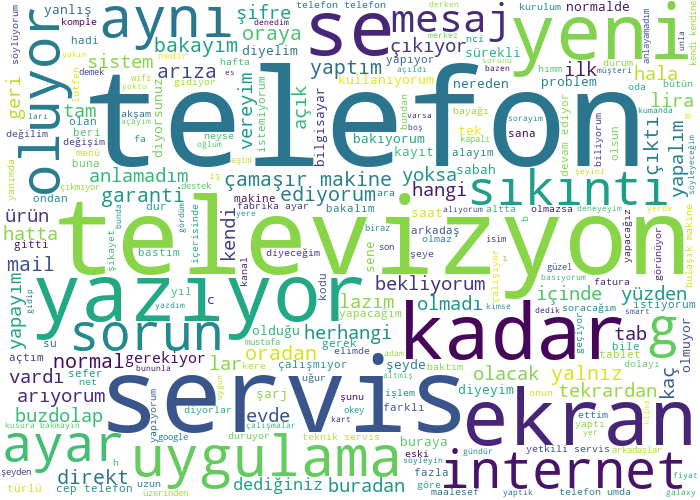

In [ ]:
# kelime bulutu en çok 250 kelime
long_string = ','.join(list(df['CustomerText'].values))
wordcloud = WordCloud(background_color="white", max_words=250, width=700, height=500, contour_width=10, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()


In [ ]:
# cümleleri kelimeler listesine dönüştür.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_article_list = df.CustomerText.tolist()
data_words = list(sent_to_words(df_article_list))

print(data_words[:1])

[['kampanyaya', 'ılırım', 'basarıyla', 'uclandırmak', 'televizyon', 'ogrenmek', 'basvuru', 'versem', 'bakabilir', 'miyiz', 'para', 'kart', 'kampanyası', 'mart', 'olumsuz', 'cevap', 'aldıgım', 'bayiiye', 'doldurup', 'gondermis', 'mart', 'urunu', 'martta', 'mart', 'yanlıs', 'hatırlamıyorsam', 'doldurup', 'gondermistim', 'zeynel', 'edersem', 'esimin', 'uzerine', 'yasin', 'basarılı', 'olmus', 'oncesinde', 'anlayamadım', 'kanal', 'tarihleri', 'uygun', 'tarihleri', 'almamıstınız', 'vesaire', 'yanlıs', 'hatırlamıyorsam', 'mesaj', 'sıkıntı', 'yoktur', 'mesaj', 'tekrardan', 'kartı', 'yuk', 'karta', 'para', 'ediyorum', 'diyoruz', 'ilce', 'mart', 'nisanda', 'insanlar', 'mesaj', 'uzerine', 'zamanında', 'yaptı', 'soyledigimizde', 'bayi', 'doldurup', 'gonderdigini', 'soyledi', 'bilemiyorum', 'demek', 'sıkıntı', 'ediyorum', 'duyuyorum', 'saglıklı']]


In [ ]:
# bigram, en çok kullanılan yöntemdir. Bu yöntem metni ikişer olarak parçalamaya yarar.

bigram = gensim.models.Phrases(data_words, min_count=10, threshold=20)
# min_count= Toplam toplanan sayısı bu değerden düşük olan tüm sözcükleri ve bigramları yoksayın.
# threshold = ifadeleri oluşturmak için bir eşiği temsil eder(daha yüksek, daha az kelime öbeği anlamına gelir).
bigram_mod = gensim.models.phrases.Phraser(bigram)

# söz öbekleri oluştur
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

In [ ]:
# id->word haritalaması yüklenir
id2word = corpora.Dictionary(data_words_bigrams) # bag of words için metin külliyatı ve sözlük yapma

# metin külliyatı
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]


#model

In [ ]:
import time
from pprint import pprint

# lda modeli tanımı
def make_model(num_topics):

  t_start = time.time()

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=1000, passes = 20,
                                              alpha=2, eta=0.01, random_state=42)
# alfa, belge-konu yoğunluğunu temsil eder - daha yüksek bir alfa ile belgeler daha fazla konudan oluşur ve daha düşük alfa ile belgeler daha az konu içerir.
# eta, konu-kelime yoğunluğunu temsil eder - yüksek bir eta ile konular bütüncedeki kelimelerin çoğundan oluşur ve düşük bir eta ile birkaç kelimeden oluşur.
# dokümanın 14 konudan oluştuğunu bildiğimiz için yüksek konu sayısına göre sonuç elde edebilmek için alfa yüksek, eta düşük tutulur.

  print("Geçen süre: "+str(time.time()-t_start)+" saniye")

  pprint("********** HER KONUDAN EN ÇOK 10 KELİME *************")
  pprint(lda_model.print_topics(num_topics=-1, num_words=10))

  return lda_model

#model sonuçları

In [ ]:
lda_model = make_model(14) # şimdilik 14 konu aranır. daha sonra optimum konu sayısı bulunacak.

Geçen süre: 202.94348740577698 saniye
'********** HER KONUDAN EN ÇOK 10 KELİME *************'
[(0,
  '0.056*"garanti" + 0.016*"fatura" + 0.016*"tablet" + 0.011*"elimde" + '
  '0.011*"gonderdim" + 0.009*"ucret" + 0.008*"yıl" + 0.008*"arıza" + '
  '0.008*"kargo" + 0.008*"yoksa"'),
 (1,
  '0.123*"servis" + 0.021*"saat" + 0.021*"kayıt" + 0.018*"bekliyorum" + '
  '0.015*"sabah" + 0.013*"arıyorum" + 0.010*"evde" + 0.009*"ediyorum" + '
  '0.008*"lutfen" + 0.007*"arkadas"'),
 (2,
  '0.234*"telefon" + 0.013*"sifre" + 0.011*"eski" + 0.010*"yeni" + '
  '0.009*"bilgisayar" + 0.007*"yorum" + 0.007*"kendi" + 0.006*"kullanıyorum" + '
  '0.005*"es" + 0.004*"telefon_umda"'),
 (3,
  '0.138*"televizyon" + 0.029*"internet" + 0.013*"destek" + 0.011*"goruntu" + '
  '0.009*"smart" + 0.009*"baglı" + 0.009*"kumanda" + 0.007*"kodu" + '
  '0.007*"actım" + 0.007*"youtube"'),
 (4,
  '0.045*"uygulama" + 0.037*"ayar" + 0.015*"internet" + 0.012*"yaptım" + '
  '0.009*"wifi" + 0.008*"sifre" + 0.008*"fabrika_ayar" + 0.0

In [ ]:
# konuların(kümelerin) görsel gösterimi

pyLDAvis.enable_notebook()
vis_data = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


#model değerlendirme

## C_v (14 adet konu için)

In [ ]:
# tutarlılığı ölçmek (0 ile 1 arası skor / skorun 1'e yakın olması daha iyidir.)
# C_v: Normalleştirilmiş noktasal karşılıklı bilgi (NPMI) ve kosinüs benzerliğini kullanan dolaylı bir doğrulama ölçüsüne dayanır.
# Kayan pencere algoritmasına dayanır. En iyi kelimelerin tek kümeli segmentasyonu, her en iyi kelime vektörü ile tüm en iyi kelime vektörlerinin toplamı arasındaki benzerliğin hesaplanmasını sağlar.
# Benzerlik ölçüsü olarak kosinüs kullanılır. Tutarlılık, bu benzerliklerin aritmetik ortalamasıdır.

from gensim.models.coherencemodel import CoherenceModel
cv_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
print('c_v skoru: ', cv_lda.get_coherence())

c_v skoru:  0.38621657217900435


## NPMI (14 adet konu için)

In [ ]:
# NPMI metriği, UCI'ın PMI yerine NPMI kullanılarak geliştirilmiş bir tutarlılık ölçüsüdür.
# 1 ile 1 arasında sürekli bir değerdir. 1'e yaklaştıkça birlikte oluşumu gösterir.
# 0'a yakınsa bağımsızlığı gösterir.
from gensim.models.coherencemodel import CoherenceModel
cnpmi_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_npmi')
print('c_npmi skoru: ', cnpmi_lda.get_coherence())

c_npmi skoru:  0.026069372737284106


## Topic Diversity (14 adet konu için)

In [ ]:
# Konu çeşitliliği açısından değerlendirmek için aşağıdaki kod yazılıyor.

import numpy as np
from rbo import rbo
from scipy.spatial import distance
from itertools import combinations
from word_embeddings_rbo import word_embeddings_rbo

def proportion_unique_words(topics, topk=10):
    """
    compute the proportion of unique words

    Parameters
    ----------
    topics: a list of lists of words
    topk: top k words on which the topic diversity will be computed
    """
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than '+str(topk))
    else:
        unique_words = set()
        for topic in topics:
            unique_words = unique_words.union(set(topic[:topk]))
        puw = len(unique_words) / (topk * len(topics))
        return puw


def irbo(topics, weight=0.9, topk=10):
    """
    compute the inverted rank-biased overlap

    Parameters
    ----------
    topics: a list of lists of words
    weight: p (float), default 1.0: Weight of each
        agreement at depth d:p**(d-1). When set
        to 1.0, there is no weight, the rbo returns
        to average overlap.
    topk: top k words on which the topic diversity
          will be computed

    Returns
    -------
    irbo : score of the rank biased overlap over the topics
    """
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than topk')
    else:
        collect = []
        for list1, list2 in combinations(topics, 2):
            word2index = get_word2index(list1, list2)
            indexed_list1 = [word2index[word] for word in list1]
            indexed_list2 = [word2index[word] for word in list2]
            rbo_val = rbo(indexed_list1[:topk], indexed_list2[:topk], p=weight)[2]
            collect.append(rbo_val)
        return 1 - np.mean(collect)


def word_embedding_irbo(topics, word_embedding_model, weight=0.9, topk=10):
    '''
    compute the word embedding-based inverted rank-biased overlap

    Parameters
    ----------
    topics: a list of lists of words
    weight: p (float), default 1.0: Weight of each agreement at depth d:
    p**(d-1). When set to 1.0, there is no weight, the rbo returns to average overlap.

    Returns
    -------
    weirbo: word embedding-based inverted rank_biased_overlap over the topics
    '''
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than topk')
    else:
        collect = []
        for list1, list2 in combinations(topics, 2):
            word2index = get_word2index(list1, list2)
            index2word = {v: k for k, v in word2index.items()}
            indexed_list1 = [word2index[word] for word in list1]
            indexed_list2 = [word2index[word] for word in list2]
            rbo_val = word_embeddings_rbo(indexed_list1[:topk], indexed_list2[:topk], p=weight,
                                          index2word=index2word, word2vec=word_embedding_model)[2]
            collect.append(rbo_val)
        return 1 - np.mean(collect)


def pairwise_jaccard_diversity(topics, topk=10):
    '''
    compute the average pairwise jaccard distance between the topics

    Parameters
    ----------
    topics: a list of lists of words
    topk: top k words on which the topic diversity
          will be computed

    Returns
    -------
    pjd: average pairwise jaccard distance
    '''
    dist = 0
    count = 0
    for list1, list2 in combinations(topics, 2):
        js = 1 - len(set(list1).intersection(set(list2)))/len(set(list1).union(set(list2)))
        dist = dist + js
        count = count + 1
    return dist/count


def pairwise_word_embedding_distance(topics, word_embedding_model, topk=10):
    """
    :param topk: how many most likely words to consider in the evaluation
    :return: topic coherence computed on the word embeddings similarities
    """
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than topk')
    else:
        count = 0
        sum_dist = 0
        for list1, list2 in combinations(topics, 2):
            count = count+1
            word_counts = 0
            dist = 0
            for word1 in list1[:topk]:
                for word2 in list2[:topk]:
                    dist = dist + distance.cosine(word_embedding_model.wv[word1], word_embedding_model.wv[word2])
                    word_counts = word_counts + 1

            dist = dist/word_counts
            sum_dist = sum_dist + dist
        return sum_dist/count


def centroid_distance(topics, word_embedding_model, topk=10):
    """
    :param topk: how many most likely words to consider in the evaluation
    :return: topic coherence computed on the word embeddings similarities
    """
    if topk > len(topics[0]):
        raise Exception('Words in topics are less than topk')
    else:
        count = 0
        for list1, list2 in combinations(topics, 2):
            count = count + 1
            centroid1 = np.zeros(word_embedding_model.vector_size)
            centroid2 = np.zeros(word_embedding_model.vector_size)
            for word1 in list1[:topk]:
                centroid1 = centroid1 + word_embedding_model[word1]
            for word2 in list2[:topk]:
                centroid2 = centroid2 + word_embedding_model[word2]
            centroid1 = centroid1 / len(list1[:topk])
            centroid2 = centroid2 / len(list2[:topk])
        return distance.cosine(centroid1, centroid2)


def get_word2index(list1, list2):
    words = set(list1)
    words = words.union(set(list2))
    word2index = {w: i for i, w in enumerate(words)}
    return word2index


"""Rank-biased overlap, a ragged sorted list similarity measure.
See http://doi.acm.org/10.1145/1852102.1852106 for details. All functions
directly corresponding to concepts from the paper are named so that they can be
clearly cross-identified.
The definition of overlap has been modified to account for ties. Without this,
results for lists with tied items were being inflated. The modification itself
is not mentioned in the paper but seems to be reasonable, see function
``overlap()``. Places in the code which diverge from the spec in the paper
because of this are highlighted with comments.
The two main functions for performing an RBO analysis are ``rbo()`` and
``rbo_dict()``; see their respective docstrings for how to use them.
The following doctest just checks that equivalent specifications of a
problem yield the same result using both functions:
    >>> lst1 = [{"c", "a"}, "b", "d"]
    >>> lst2 = ["a", {"c", "b"}, "d"]
    >>> ans_rbo = _round(rbo(lst1, lst2, p=.9))
    >>> dct1 = dict(a=1, b=2, c=1, d=3)
    >>> dct2 = dict(a=1, b=2, c=2, d=3)
    >>> ans_rbo_dict = _round(rbo_dict(dct1, dct2, p=.9, sort_ascending=True))
    >>> ans_rbo == ans_rbo_dict
    True
"""

from __future__ import division

import math
from bisect import bisect_left
from collections import namedtuple


RBO = namedtuple("RBO", "min res ext")
RBO.__doc__ += ": Result of full RBO analysis"
RBO.min.__doc__ = "Lower bound estimate"
RBO.res.__doc__ = "Residual corresponding to min; min + res is an upper bound estimate"
RBO.ext.__doc__ = "Extrapolated point estimate"


def _round(obj):
    if isinstance(obj, RBO):
        return RBO(_round(obj.min), _round(obj.res), _round(obj.ext))
    else:
        return round(obj, 3)


def set_at_depth(lst, depth):
    ans = set()
    for v in lst[:depth]:
        if isinstance(v, set):
            ans.update(v)
        else:
            ans.add(v)
    return ans


def raw_overlap(list1, list2, depth):
    """Overlap as defined in the article.
    """
    set1, set2 = set_at_depth(list1, depth), set_at_depth(list2, depth)
    return len(set1.intersection(set2)), len(set1), len(set2)


def overlap(list1, list2, depth):
    """Overlap which accounts for possible ties.
    This isn't mentioned in the paper but should be used in the ``rbo*()``
    functions below, otherwise overlap at a given depth might be > depth which
    inflates the result.
    There are no guidelines in the paper as to what's a good way to calculate
    this, but a good guess is agreement scaled by the minimum between the
    requested depth and the lengths of the considered lists (overlap shouldn't
    be larger than the number of ranks in the shorter list, otherwise results
    are conspicuously wrong when the lists are of unequal lengths -- rbo_ext is
    not between rbo_min and rbo_min + rbo_res.
    >>> overlap("abcd", "abcd", 3)
    3.0
    >>> overlap("abcd", "abcd", 5)
    4.0
    >>> overlap(["a", {"b", "c"}, "d"], ["a", {"b", "c"}, "d"], 2)
    2.0
    >>> overlap(["a", {"b", "c"}, "d"], ["a", {"b", "c"}, "d"], 3)
    3.0
    """
    ov = agreement(list1, list2, depth) * min(depth, len(list1), len(list2))
    return ov
    # NOTE: comment the preceding and uncomment the following line if you want
    # to stick to the algorithm as defined by the paper
    # return raw_overlap(list1, list2, depth)[0]


def agreement(list1, list2, depth):
    """Proportion of shared values between two sorted lists at given depth.
    >>> _round(agreement("abcde", "abdcf", 1))
    1.0
    >>> _round(agreement("abcde", "abdcf", 3))
    0.667
    >>> _round(agreement("abcde", "abdcf", 4))
    1.0
    >>> _round(agreement("abcde", "abdcf", 5))
    0.8
    >>> _round(agreement([{1, 2}, 3], [1, {2, 3}], 1))
    0.667
    >>> _round(agreement([{1, 2}, 3], [1, {2, 3}], 2))
    1.0
    """
    len_intersection, len_set1, len_set2 = raw_overlap(list1, list2, depth)
    return 2 * len_intersection / (len_set1 + len_set2)


def cumulative_agreement(list1, list2, depth):
    return (agreement(list1, list2, d) for d in range(1, depth + 1))


def average_overlap(list1, list2, depth=None):
    """Calculate average overlap between ``list1`` and ``list2``.
    >>> _round(average_overlap("abcdefg", "zcavwxy", 1))
    0.0
    >>> _round(average_overlap("abcdefg", "zcavwxy", 2))
    0.0
    >>> _round(average_overlap("abcdefg", "zcavwxy", 3))
    0.222
    >>> _round(average_overlap("abcdefg", "zcavwxy", 4))
    0.292
    >>> _round(average_overlap("abcdefg", "zcavwxy", 5))
    0.313
    >>> _round(average_overlap("abcdefg", "zcavwxy", 6))
    0.317
    >>> _round(average_overlap("abcdefg", "zcavwxy", 7))
    0.312
    """
    depth = min(len(list1), len(list2)) if depth is None else depth
    return sum(cumulative_agreement(list1, list2, depth)) / depth


def rbo_at_k(list1, list2, p, depth=None):
    # ``p**d`` here instead of ``p**(d - 1)`` because enumerate starts at
    # 0
    depth = min(len(list1), len(list2)) if depth is None else depth
    d_a = enumerate(cumulative_agreement(list1, list2, depth))
    return (1 - p) * sum(p ** d * a for (d, a) in d_a)


def rbo_min(list1, list2, p, depth=None):
    """Tight lower bound on RBO.
    See equation (11) in paper.
    >>> _round(rbo_min("abcdefg", "abcdefg", .9))
    0.767
    >>> _round(rbo_min("abcdefgh", "abcdefg", .9))
    0.767
    """
    depth = min(len(list1), len(list2)) if depth is None else depth
    x_k = overlap(list1, list2, depth)
    log_term = x_k * math.log(1 - p)
    sum_term = sum(
        p ** d / d * (overlap(list1, list2, d) - x_k) for d in range(1, depth + 1)
    )
    return (1 - p) / p * (sum_term - log_term)


def rbo_res(list1, list2, p):
    """Upper bound on residual overlap beyond evaluated depth.
    See equation (30) in paper.
    NOTE: The doctests weren't verified against manual computations but seem
    plausible. In particular, for identical lists, ``rbo_min()`` and
    ``rbo_res()`` should add up to 1, which is the case.
    >>> _round(rbo_res("abcdefg", "abcdefg", .9))
    0.233
    >>> _round(rbo_res("abcdefg", "abcdefghijklmnopqrstuvwxyz", .9))
    0.239
    """
    S, L = sorted((list1, list2), key=len)
    s, l = len(S), len(L)
    x_l = overlap(list1, list2, l)
    # since overlap(...) can be fractional in the general case of ties and f
    # must be an integer --> math.ceil()
    f = int(math.ceil(l + s - x_l))
    # upper bound of range() is non-inclusive, therefore + 1 is needed
    term1 = s * sum(p ** d / d for d in range(s + 1, f + 1))
    term2 = l * sum(p ** d / d for d in range(l + 1, f + 1))
    term3 = x_l * (math.log(1 / (1 - p)) - sum(p ** d / d for d in range(1, f + 1)))
    return p ** s + p ** l - p ** f - (1 - p) / p * (term1 + term2 + term3)


def rbo_ext(list1, list2, p):
    """RBO point estimate based on extrapolating observed overlap.
    See equation (32) in paper.
    NOTE: The doctests weren't verified against manual computations but seem
    plausible.
    >>> _round(rbo_ext("abcdefg", "abcdefg", .9))
    1.0
    >>> _round(rbo_ext("abcdefg", "bacdefg", .9))
    0.9
    """
    S, L = sorted((list1, list2), key=len)
    s, l = len(S), len(L)
    x_l = overlap(list1, list2, l)
    x_s = overlap(list1, list2, s)
    # the paper says overlap(..., d) / d, but it should be replaced by
    # agreement(..., d) defined as per equation (28) so that ties are handled
    # properly (otherwise values > 1 will be returned)
    # sum1 = sum(p**d * overlap(list1, list2, d)[0] / d for d in range(1, l + 1))
    sum1 = sum(p ** d * agreement(list1, list2, d) for d in range(1, l + 1))
    sum2 = sum(p ** d * x_s * (d - s) / s / d for d in range(s + 1, l + 1))
    term1 = (1 - p) / p * (sum1 + sum2)
    term2 = p ** l * ((x_l - x_s) / l + x_s / s)
    return term1 + term2


def rbo(list1, list2, p):
    """Complete RBO analysis (lower bound, residual, point estimate).
    ``list`` arguments should be already correctly sorted iterables and each
    item should either be an atomic value or a set of values tied for that
    rank. ``p`` is the probability of looking for overlap at rank k + 1 after
    having examined rank k.
    >>> lst1 = [{"c", "a"}, "b", "d"]
    >>> lst2 = ["a", {"c", "b"}, "d"]
    >>> _round(rbo(lst1, lst2, p=.9))
    RBO(min=0.489, res=0.477, ext=0.967)
    """
    if not 0 <= p <= 1:
        raise ValueError("The ``p`` parameter must be between 0 and 1.")
    args = (list1, list2, p)
    return RBO(rbo_min(*args), rbo_res(*args), rbo_ext(*args))


def sort_dict(dct, *, ascending=False):
    """Sort keys in ``dct`` according to their corresponding values.
    Sorts in descending order by default, because the values are
    typically scores, i.e. the higher the better. Specify
    ``ascending=True`` if the values are ranks, or some sort of score
    where lower values are better.
    Ties are handled by creating sets of tied keys at the given position
    in the sorted list.
    >>> dct = dict(a=1, b=2, c=1, d=3)
    >>> list(sort_dict(dct)) == ['d', 'b', {'a', 'c'}]
    True
    >>> list(sort_dict(dct, ascending=True)) == [{'a', 'c'}, 'b', 'd']
    True
    """
    scores = []
    items = []
    # items should be unique, scores don't have to
    for item, score in dct.items():
        if not ascending:
            score *= -1
        i = bisect_left(scores, score)
        if i == len(scores):
            scores.append(score)
            items.append(item)
        elif scores[i] == score:
            existing_item = items[i]
            if isinstance(existing_item, set):
                existing_item.add(item)
            else:
                items[i] = {existing_item, item}
        else:
            scores.insert(i, score)
            items.insert(i, item)
    return items


def rbo_dict(dict1, dict2, p, *, sort_ascending=False):
    """Wrapper around ``rbo()`` for dict input.
    Each dict maps items to be sorted to the score according to which
    they should be sorted. The RBO analysis is then performed on the
    resulting sorted lists.
    The sort is descending by default, because scores are typically the
    higher the better, but this can be overridden by specifying
    ``sort_ascending=True``.
    >>> dct1 = dict(a=1, b=2, c=1, d=3)
    >>> dct2 = dict(a=1, b=2, c=2, d=3)
    >>> _round(rbo_dict(dct1, dct2, p=.9, sort_ascending=True))
    RBO(min=0.489, res=0.477, ext=0.967)
    """
    list1, list2 = (
        sort_dict(dict1, ascending=sort_ascending),
        sort_dict(dict2, ascending=sort_ascending),
    )
    return rbo(list1, list2, p)


if __name__ in ("__main__", "__console__"):
    import doctest

    doctest.testmod()


from __future__ import division

import math
from bisect import bisect_left
from collections import namedtuple
from collections import OrderedDict

RBO = namedtuple("RBO", "min res ext")
RBO.__doc__ += ": Result of full RBO analysis"
RBO.min.__doc__ = "Lower bound estimate"
RBO.res.__doc__ = "Residual corresponding to min; min + res is an upper bound estimate"
RBO.ext.__doc__ = "Extrapolated point estimate"

def _round(obj):
    if isinstance(obj, RBO):
        return RBO(_round(obj.min), _round(obj.res), _round(obj.ext))
    else:
        return round(obj, 3)


def set_at_depth(lst, depth):
    ans = set()
    for v in lst[:depth]:
        if isinstance(v, set):
            ans.update(v)
        else:
            ans.add(v)
    return ans


def embeddings_overlap(list1, list2, depth, index2word, word2vec):
    #set1, set2 = set_at_depth(list1, depth), set_at_depth(list2, depth)
    #return len(set1.intersection(set2)), len(set1), len(set2)

    set1, set2 = set_at_depth(list1, depth), set_at_depth(list2, depth)
    word_list1 = [index2word[index] for index in list1]
    word_list2 = [index2word[index] for index in list2]

    similarities = {}
    for w1 in word_list1[:depth]:
        for w2 in word_list2[:depth]:
            similarities[(w1,w2)] = word2vec.similarity(w1, w2)

    similarities = OrderedDict(sorted(similarities.items(), key=lambda x: -x[1]))

    e_ov = 0
    key_list = list(similarities.keys())
    for k in key_list:
        if k in similarities.keys():
            #print(k, similarities[k])
            e_ov = e_ov + similarities[k]
            similarities = {save_k: v for save_k, v in similarities.items()
                            if save_k[0] != k[0] and save_k[1] != k[1]}
    #e_ov = 1
    #print("****")
    return e_ov, len(set1), len(set2)


def overlap(list1, list2, depth, index2word, word2vec):
    #return agreement(list1, list2, depth) * min(depth, len(list1), len(list2))
    # NOTE: comment the preceding and uncomment the following line if you want
    # to stick to the algorithm as defined by the paper
    ov = embeddings_overlap(list1, list2, depth, index2word, word2vec)[0]
    return ov


def agreement(list1, list2, depth, index2word, word2vec):
    """Proportion of shared values between two sorted lists at given depth."""
    len_intersection, len_set1, len_set2 = embeddings_overlap(list1, list2, depth, index2word, word2vec)
    return 2 * len_intersection / (len_set1 + len_set2)


def cumulative_agreement(list1, list2, depth, index2word, word2vec):
    return (agreement(list1, list2, d, index2word, word2vec) for d in range(1, depth + 1))


def average_overlap(list1, list2, index2word, word2vec, depth=None):
    """Calculate average overlap between ``list1`` and ``list2``.
    """
    depth = min(len(list1), len(list2)) if depth is None else depth
    return sum(cumulative_agreement(list1, list2, depth, index2word=index2word, word2vec=word2vec)) / depth


def rbo_at_k(list1, list2, p, index2word, word2vec, depth=None):
    # ``p**d`` here instead of ``p**(d - 1)`` because enumerate starts at
    # 0
    depth = min(len(list1), len(list2)) if depth is None else depth
    d_a = enumerate(cumulative_agreement(list1, list2, depth, index2word=index2word, word2vec=word2vec))
    return (1 - p) * sum(p ** d * a for (d, a) in d_a)


def rbo_min(list1, list2, p, index2word, word2vec, depth=None):
    """Tight lower bound on RBO.
    See equation (11) in paper.
    """
    depth = min(len(list1), len(list2)) if depth is None else depth
    x_k = overlap(list1, list2, depth, index2word, word2vec)
    log_term = x_k * math.log(1 - p)
    sum_term = sum(
        p ** d / d * (overlap(list1, list2, d, index2word, word2vec=word2vec) - x_k) for d in range(1, depth + 1)
    )
    return (1 - p) / p * (sum_term - log_term)


def rbo_res(list1, list2, p, index2word, word2vec):
    """Upper bound on residual overlap beyond evaluated depth.
    See equation (30) in paper.
    NOTE: The doctests weren't verified against manual computations but seem
    plausible. In particular, for identical lists, ``rbo_min()`` and
    ``rbo_res()`` should add up to 1, which is the case.
    """
    S, L = sorted((list1, list2), key=len)
    s, l = len(S), len(L)
    x_l = overlap(list1, list2, l, index2word, word2vec)
    # since overlap(...) can be fractional in the general case of ties and f
    # must be an integer --> math.ceil()
    f = int(math.ceil(l + s - x_l))
    # upper bound of range() is non-inclusive, therefore + 1 is needed
    term1 = s * sum(p ** d / d for d in range(s + 1, f + 1))
    term2 = l * sum(p ** d / d for d in range(l + 1, f + 1))
    term3 = x_l * (math.log(1 / (1 - p)) - sum(p ** d / d for d in range(1, f + 1)))
    return p ** s + p ** l - p ** f - (1 - p) / p * (term1 + term2 + term3)


def rbo_ext(list1, list2, p, index2word, word2vec):
    """RBO point estimate based on extrapolating observed overlap.
    See equation (32) in paper.
    NOTE: The doctests weren't verified against manual computations but seem
    plausible.
    >>> _round(rbo_ext("abcdefg", "abcdefg", .9))
    1.0
    >>> _round(rbo_ext("abcdefg", "bacdefg", .9))
    0.9
    """
    S, L = sorted((list1, list2), key=len)
    s, l = len(S), len(L)
    x_l = overlap(list1, list2, l, index2word, word2vec)
    x_s = overlap(list1, list2, s, index2word, word2vec)
    # the paper says overlap(..., d) / d, but it should be replaced by
    # agreement(..., d) defined as per equation (28) so that ties are handled
    # properly (otherwise values > 1 will be returned)
    # sum1 = sum(p**d * overlap(list1, list2, d)[0] / d for d in range(1, l + 1))
    sum1 = sum(p ** d * agreement(list1, list2, d, index2word=index2word, word2vec=word2vec)
               for d in range(1, l + 1))
    sum2 = sum(p ** d * x_s * (d - s) / s / d for d in range(s + 1, l + 1))
    term1 = (1 - p) / p * (sum1 + sum2)
    term2 = p ** l * ((x_l - x_s) / l + x_s / s)
    return term1 + term2


def word_embeddings_rbo(list1, list2, p, index2word, word2vec):
    """Complete RBO analysis (lower bound, residual, point estimate).
    ``list`` arguments should be already correctly sorted iterables and each
    item should either be an atomic value or a set of values tied for that
    rank. ``p`` is the probability of looking for overlap at rank k + 1 after
    having examined rank k.
    >>> lst1 = [{"c", "a"}, "b", "d"]
    >>> lst2 = ["a", {"c", "b"}, "d"]
    >>> _round(rbo(lst1, lst2, p=.9))
    RBO(min=0.489, res=0.477, ext=0.967)
    """
    if not 0 <= p <= 1:
        raise ValueError("The ``p`` parameter must be between 0 and 1.")
    args = (list1, list2, p, index2word, word2vec)

    return RBO(rbo_min(*args), rbo_res(*args), rbo_ext(*args))


def sort_dict(dct, *, ascending=False):
    """Sort keys in ``dct`` according to their corresponding values.
    Sorts in descending order by default, because the values are
    typically scores, i.e. the higher the better. Specify
    ``ascending=True`` if the values are ranks, or some sort of score
    where lower values are better.
    Ties are handled by creating sets of tied keys at the given position
    in the sorted list.
    >>> dct = dict(a=1, b=2, c=1, d=3)
    >>> list(sort_dict(dct)) == ['d', 'b', {'a', 'c'}]
    True
    >>> list(sort_dict(dct, ascending=True)) == [{'a', 'c'}, 'b', 'd']
    True
    """
    scores = []
    items = []
    # items should be unique, scores don't have to
    for item, score in dct.items():
        if not ascending:
            score *= -1
        i = bisect_left(scores, score)
        if i == len(scores):
            scores.append(score)
            items.append(item)
        elif scores[i] == score:
            existing_item = items[i]
            if isinstance(existing_item, set):
                existing_item.add(item)
            else:
                items[i] = {existing_item, item}
        else:
            scores.insert(i, score)
            items.insert(i, item)
    return items


def rbo_dict(dict1, dict2, p, index2word, word2vec, *, sort_ascending=False):
    """Wrapper around ``rbo()`` for dict input.
    Each dict maps items to be sorted to the score according to which
    they should be sorted. The RBO analysis is then performed on the
    resulting sorted lists.
    The sort is descending by default, because scores are typically the
    higher the better, but this can be overridden by specifying
    ``sort_ascending=True``.
    """
    list1, list2 = (
        sort_dict(dict1, ascending=sort_ascending),
        sort_dict(dict2, ascending=sort_ascending),
    )
    return word_embeddings_rbo(list1, list2, p, index2word, word2vec)


In [ ]:
# Konu çeşitliliğini değerlendirmek için kütüphane
from diversity_metrics import *

from gensim.test.utils import datapath
from gensim.models import KeyedVectors

In [ ]:
word_list1 =['garanti','fatura','tablet', 'elimde', 'gonderdim','ucret', 'yıl', 'arıza','kargo','yoksa']
word_list2= ['servis', 'saat', 'kayıt','bekliyorum','sabah','arıyorum', 'evde','ediyorum','lutfen','arkadas']
word_list3 =['telefon','sifre', 'eski','yeni','bilgisayar','yorum','kendi','kullanıyorum','es','telefon']
word_list4= ['televizyon','internet','destek','goruntu','smart','baglı','kumanda','kodu','actım','youtube']
word_list5 =['uygulama','ayar','internet','yaptım','wifi','sifre','fabrika_ayar','guncelleme','acık','actım']
word_list6= ['sikayet','arıza','geri','kadar','degisim','aynı','iade','diyorlar','istemiyorum','servis']
word_list7 =['yazıyor','ayar','cıktı','kanal','yaptım','bastım','cıkıyor','uydu','yeni','geri']
word_list8= ['kadar','sene','guzel','buraya','fiyat','lira','sana','sunu','buna','bile']
word_list9 =['urun','bilgi','kart','ilgili','fa' ,'mesaj','hafta','sistem','icerisinde','kurulum']
word_list10= ['makine','arıza','buzdolap','camasır_makine','su','calısmıyor','yıl','calısıyor','bulasık_makine','duruyor']
word_list11=['aynı','sorun','sarj','oluyor','problem','surekli','olmuyor','olmadı','bazen','acılmıyor']
word_list12= ['ediyorum','klima','ugur','calısmalar','kodu','seri','geciyor','kac','evde','montaj']
word_list13 =['ses','ekran','mesaj','anlamadım','vardı','mustafa','ablam','oglum','alıyorum','hadi']
word_list14= ['sıkıntı','mail','herhangi','yeni','tekrardan','kendi','oradan','gorunuyor','bakıyorum','bakayım']

topics = [word_list1, word_list2, word_list3, word_list4, word_list5, word_list6, word_list7, word_list8, word_list9, word_list10, word_list11, word_list12,
          word_list13, word_list14]

In [ ]:
print("puw:",proportion_unique_words(topics, topk=10)) # Benzersiz kelimelerin oranı(puw)
print("jd:", pairwise_jaccard_diversity(topics, topk=10)) # ortalama Jaccard Mesafesi(jd) (0-1)
# Jaccard endeksinin istenmeyen özelliği, sıralamadaki herhangi bir değişikliğin ölçüme yansımamasıdır.
# Açıkçası, bir konu kararlılığı ölçüsü, hem kelime kesişimindeki hem de iki konunun sıralamasındaki farklılıkları hesaba katmalıdır. Bu yüzden iRBO kullanıldı.
#  Ters RBO, ilk N kelimelere dayalı olarak kelime sıralamasına göre ağırlıklandırılmış konular arasındaki kopukluğun bir ölçüsüdür.
print("irbo p=0.5:",irbo(topics, weight=0.5, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,5
print("irbo p=0.9:",irbo(topics, weight=0.9, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,9

puw: 0.8571428571428571
jd: 0.9873968480779626
irbo p=0.5: 0.9940471160946666
irbo p=0.9: 0.9834015822460009


## Konu sayısına göre değerlendirmeler

In [ ]:
# konu sayısı değiştikçe skor da değişmektedir bu sebeple konu sayısının değişmesiyle skorun değişmesini gözlemlenir ve en iyi konu saysına karar verilir.
import time
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):

    start_time = time.perf_counter()
    cv_values = []
    cnpmi_values=[]
    time_vals=[]
    model_list = []

    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=1000, passes = 20,
                                                alpha=2, eta=0.01, random_state=42)
        model_list.append(model)

        cv_model = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_v')
        cnpmi_model = CoherenceModel(model=model, texts=texts, dictionary=id2word, coherence='c_npmi')

        end_time = time.perf_counter()

        cv_values.append(cv_model.get_coherence())
        cnpmi_values.append(cnpmi_model.get_coherence())
        time_vals.append((end_time-start_time)/60)

    return model_list, cv_values, cnpmi_values, time_vals

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

x = range(5, 20, 3)
model_list, cv_values, cnpmi_values, time_vals= compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_words_bigrams,
                                                                                                                     start=5, limit=20, step=3)

In [ ]:
timeee=[]
timeee.append(time_vals[0])
for i in range(0,4):
    sure=time_vals[i+1]-time_vals[i]
    timeee.append(sure)

sonuc_df = pd.DataFrame(data = {'Konu sayısı': x, 'c_v skoru(0,1)': cv_values, 'NPMI skoru(-1,1)': cnpmi_values, 'Süre(dakika)': timeee})
sonuc_df

,Konu sayısı,"c_v skoru(0,1)","NPMI skoru(-1,1)",Süre(dakika)
0,5,0.350815,0.008859,3.018627
1,8,0.365455,0.018078,3.776717
2,11,0.362738,0.019427,3.976552
3,14,0.386217,0.026069,4.178132
4,17,0.368034,0.023722,4.962622


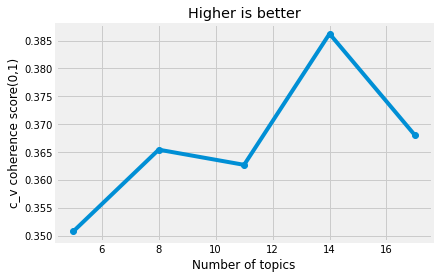

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

start=5; limit=20; step=3;
x = range(start, limit, step)
plt.plot(x, cv_values, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("c_v coherence score(0,1)")
plt.title('Higher is better')
plt.show()

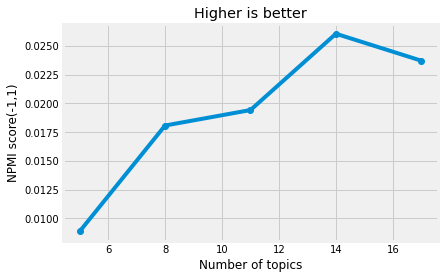

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

start=5; limit=20; step=3;
x = range(start, limit, step)
plt.plot(x, cnpmi_values, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("NPMI score(-1,1)")
plt.title('Higher is better')
plt.show()

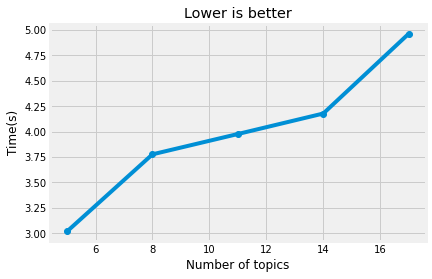

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

start=5; limit=20; step=3;
x = range(start, limit, step)
plt.plot(x, timeee, 'o-')
plt.xlabel("Number of topics")
plt.ylabel("Time(s)")
plt.title('Lower is better')
plt.show()

In [ ]:
data_dict = {"Algorithms": ["C_v", "NPMI", "PUW", "Jaccard Diversity","iRBO(w=0.9)","iRBO(w=0.5)"],
            'LDA': [0.3862, 0.0261, 0.8571, 0.9874, 0.9940, 0.9834],
            'BERTopic': [0.6271, -0.0239, 0.5571, 0.9019, 0.8747, 0.8395]}
data_df = pd.DataFrame(data_dict)
data_df

,Algorithms,LDA,BERTopic
0,C_v,0.3862,0.6271
1,NPMI,0.0261,-0.0239
2,PUW,0.8571,0.5571
3,Jaccard Diversity,0.9874,0.9019
4,iRBO(w=0.9),0.9940,0.8747
5,iRBO(w=0.5),0.9834,0.8395


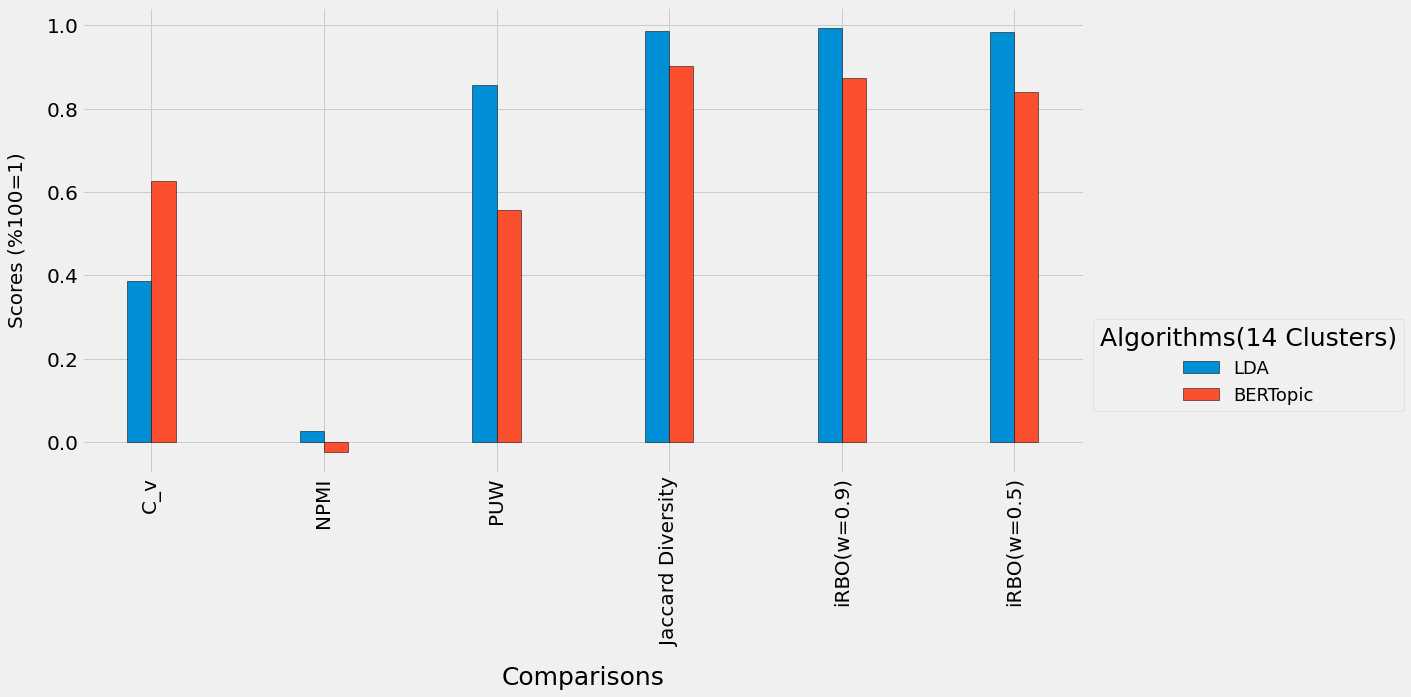

In [ ]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(1,1, figsize = (16,8))
label = data_df["Algorithms"]
x = np.arange(len(label))

width = 0.14


rect2 = ax.bar(x - width/2,
              data_df['LDA'],
              width = width,
              label = 'LDA',
              edgecolor = "black"
              )

rect4 = ax.bar(x + width/2,
              data_df['BERTopic'],
              width = width,
              label = 'BERTopic',
              edgecolor = "black"
              )


ax.set_ylabel("Scores (%100=1)",
             fontsize = 20,
             labelpad = 20)
ax.set_xlabel("Comparisons",
             fontsize = 25,
             labelpad =20)

ax.set_xticks(x)
ax.set_xticklabels(label)

ax.legend(title = "Algorithms(14 Clusters)",
         fontsize = 18,
         title_fontsize = 25,
         bbox_to_anchor = (1, 0.35))
ax.tick_params(axis = "x",
              which = "both",
              labelrotation = 90,
               labelsize =20)
ax.tick_params(axis = "y",
              which = "both",
              labelsize = 20)

plt.savefig('data32.png')

In [ ]:
# Her belgede baskın konuyu ve katkısını bulmak
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Her belge için Baskın konuyu, Yüzde Katkıyı ve Anahtar Kelimeleri bul
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Çıktının sonuna orijinal metni ekle
    contents = pd.Series(df.CustomerText)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doküman No', 'Baskın Konu', 'Konunun Katkısı', 'Anahtar kelimeler', 'Yazı']
df_dominant_topic.set_index('Doküman No')
# Kaydet
df_dominant_topic.to_csv('/content/dominant_topic.csv', sep=',')
df_dominant_topic

,Doküman No,Baskın Konu,Konunun Katkısı,Anahtar kelimeler,Yazı
0,0,8.0,0.4045,"urun, bilgi, kart, ilgili, fa, mesaj, hafta, s...",kampanyaya ılırım başarıyla uçlandırmak te...
1,1,9.0,0.1151,"makine, arıza, buzdolap, camasır_makine, su, c...",kaldım saat derecede evde sırf...
2,2,1.0,0.1476,"servis, saat, kayıt, bekliyorum, sabah, arıyor...",cuma günü üstte gürbüz lira abimiz arıza...
3,3,9.0,0.1293,"makine, arıza, buzdolap, camasır_makine, su, c...",faruk klima gece ilk çalıştırdım yapıla...
4,4,11.0,0.1581,"ediyorum, klima, ugur, calısmalar, kodu, seri,...",çalışmalar ceylan televizyon yeni ...
...,...,...,...,...,...
19766,19766,5.0,0.2190,"sikayet, arıza, geri, kadar, degisim, aynı, ia...",barış barış yıllar arıyorum talep ...
19767,19767,2.0,0.2331,"telefon, sifre, eski, yeni, bilgisayar, yorum,...",telefon garanti oraya kayıtımın almışlardı ...
19768,19768,3.0,0.2713,"televizyon, internet, destek, goruntu, smart, ...",işler yorum durumum vardı media mar...
19769,19769,5.0,0.2383,"sikayet, arıza, geri, kadar, degisim, aynı, ia...",merkezinden şikayet açıp ocak terbiyesiz ya...


In [ ]:
df_dominant_topic['Baskın Konu'] = df_dominant_topic['Baskın Konu'].astype(int)
df_dominant_topic

,Doküman No,Baskın Konu,Konunun Katkısı,Anahtar kelimeler,Yazı
0,0,8,0.4045,"urun, bilgi, kart, ilgili, fa, mesaj, hafta, s...",kampanyaya ılırım başarıyla uçlandırmak te...
1,1,9,0.1151,"makine, arıza, buzdolap, camasır_makine, su, c...",kaldım saat derecede evde sırf...
2,2,1,0.1476,"servis, saat, kayıt, bekliyorum, sabah, arıyor...",cuma günü üstte gürbüz lira abimiz arıza...
3,3,9,0.1293,"makine, arıza, buzdolap, camasır_makine, su, c...",faruk klima gece ilk çalıştırdım yapıla...
4,4,11,0.1581,"ediyorum, klima, ugur, calısmalar, kodu, seri,...",çalışmalar ceylan televizyon yeni ...
...,...,...,...,...,...
19766,19766,5,0.2190,"sikayet, arıza, geri, kadar, degisim, aynı, ia...",barış barış yıllar arıyorum talep ...
19767,19767,2,0.2331,"telefon, sifre, eski, yeni, bilgisayar, yorum,...",telefon garanti oraya kayıtımın almışlardı ...
19768,19768,3,0.2713,"televizyon, internet, destek, goruntu, smart, ...",işler yorum durumum vardı media mar...
19769,19769,5,0.2383,"sikayet, arıza, geri, kadar, degisim, aynı, ia...",merkezinden şikayet açıp ocak terbiyesiz ya...


## 14 ana konu için sınıflandırma algoritmaları

In [ ]:
from keras.preprocessing.text import Tokenizer # Makinenin yazıyı anlayabilmesi için Tokenizer ile veri setinde kullanılan en çok 100000 kelime ile bir sözlük oluşturulur.

tokenizer = Tokenizer(num_words=100000) # sözlük oluşturulur.
tokenizer.fit_on_texts(df_dominant_topic.Yazı) # yazılar tokene dönüştürülür.

# toplam token sayısı
num_tokens = [len(tokens) for tokens in df_dominant_topic['Yazı']]
num_tokens = np.array(num_tokens)

# max token sayısı
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)
max_tokens

# Sinir ağımız bizden girdileri eşit boyutta istiyor. Gerçek hayattaki problemlerde bu çok zordur. Bu yüzden verileri aynı boyuta getirmek için pad_sequences kullanılır.
from keras.preprocessing.sequence import pad_sequences

X = tokenizer.texts_to_sequences(df_dominant_topic['Yazı']) # cümleleri sözlükteki kelimelerin karşılığına çevrilir.
Y = pd.get_dummies(df_dominant_topic['Baskın Konu']).values # çıktı verilerimiz anlayacağı hale getirdik.
X_pad = pad_sequences(X, maxlen=max_tokens) # pad_sequences ile aynı boyuta getirilir. uzunluk olarak da önceden hesapladığımız cümle boyutu max_tokens koydum.

# verimiz dengesiz olduğu için RandomOverSampler ile verimizi yeniden örnekliyoruz.
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state = 0, sampling_strategy = "minority") # RandomUnderSampler parametreleri belirlenerek değişkene atanır. sampling_strategy, örnekleme stratejisi, minority olarak belirlendi. Çünkü verilerimiz dengesiz olduğu için azınlıkları(minority) yeniden örnekleyerek veriyi dengelemeye çalışıyoruz.
x_rus, y_rus = rus.fit_resample(X_pad, Y) # veriler yeniden örneklendirilir.
print(x_rus.shape, y_rus.shape)

from sklearn.model_selection import train_test_split # verileri eğitim ve test diye bölünür.
x_train, x_test, y_train, y_test = train_test_split(X_pad, Y, test_size = 0.25, random_state = 42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(21677, 2652) (21677, 14)
(14828, 2652) (14828, 14)
(4943, 2652) (4943, 14)


In [ ]:
from tensorflow import keras # yapay sinir ağı kullanmak için keras yüklenir.
from math import exp
import matplotlib.pyplot as plt

model_ker = keras.Sequential() # Bir sıralı(Sequential) model, tek girdi ve tek çıktı katmanın olduğu derin öğrenme modeli oluşturmaya yarar.
model_ker.add(keras.layers.Embedding(100000, 100, input_length=max_tokens)) # yazıyı vektörlere çevirir. Tanımı: Pozitif tamsayı (indeksleri) sabit boyutta yoğun vektörlere dönüştürür.
model_ker.add(keras.layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5))
model_ker.add(keras.layers.Dense(14, activation='softmax')) # çıktı katmanı. SoftMAX aktivasyon fonksiyonu, göreceli olasılıkları hesaplar. çoklu sınıf olduğu için softmax kullanılır. ağın son katmanı için aktivasyon olarak kullanılır, çünkü sonuç bir olasılık dağılımı olarak yorumlanabilir. softmanx kullanılmasının sebebi modelin multi-class ve bir doğru cevabın olmasındandır.

model_ker.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # çok sınıflı sınıflandırma problemi olduğu için categorical_crossentropy kullanıldı.

epochs = 50 # Algoritmasının tüm eğitim veri kümesinde kaç kere çalışacağını belirtir.
batch_size = 64 # batch, bir veya daha fazla örnek üzerinde yineleme yapan ve tahminlerde bulunan için bir döngü sayısıdır. her örnekten sonra tahminler beklenen çıktılarla karşılaştırılır ve bir hata hesaplanır. hataya göre tahmini iyileştirmeye çalışır.

callback = (keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, min_delta=0.0001))# model çalıştırılır(validation loss'u gözle eğer 3 epochdur(devirdir) en az 0.0001 gelişmiyorsa eğitimi durdur.)

history = model_ker.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,validation_data=[x_test,y_test],callbacks=[callback]) # model çalıştırılır

# modelimizin test verileri doğruluğu
accr = model_ker.evaluate(x_test, y_test)

Epoch 1/50
232/232 [==============================] - 2201s 9s/step - loss: 2.2942 - accuracy: 0.2276 - val_loss: 2.0133 - val_accuracy: 0.3316
Epoch 2/50
232/232 [==============================] - 2171s 9s/step - loss: 1.8668 - accuracy: 0.3712 - val_loss: 1.8796 - val_accuracy: 0.4036
Epoch 3/50
232/232 [==============================] - 2168s 9s/step - loss: 1.7122 - accuracy: 0.4338 - val_loss: 1.9606 - val_accuracy: 0.3409
Epoch 4/50
232/232 [==============================] - 2142s 9s/step - loss: 1.4495 - accuracy: 0.5177 - val_loss: 1.6961 - val_accuracy: 0.4783
Epoch 5/50
232/232 [==============================] - 2156s 9s/step - loss: 1.0616 - accuracy: 0.6475 - val_loss: 1.6998 - val_accuracy: 0.5187
Epoch 6/50
 15/232 [>.............................] - ETA: 32:15 - loss: 0.7922 - accuracy: 0.7510

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer # Metinleri makinenin anlayacağı dile çevirmek için vektörlere çevirmeliyiz. Bu yüzden bir ham doküman koleksiyonunu TF-IDF özelliklerinin bir matrisine dönüştürmek için TfidfVectorizer kullanılır.
# TF: Term Frequency=terim frekansı: bir dokümanda belirli bir terimden kaç tane olduğunu bulur. / IDF: Inverse Document Frequency=Ters doküman frekansı: belirli terimin kaç farklı dokümanda geçtiğini hesaplar.
# Tf-idf ise belirli terimin kaç farklı dokümanda kaç kere geçtiğine önem verir. Bu yüzden tf-idf kullanıldı.
from sklearn.model_selection import train_test_split # Veriyi eğitim ve test diye ayırmak için modül
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir
from sklearn.metrics import accuracy_score # doğruluk skoru hesaplamak için yüklenir.

In [ ]:
dataDoc = df_dominant_topic['Yazı'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_dominant_topic['Baskın Konu'].values.tolist() # kategori verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

SGDli Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.7984
SGDli Lojistik Regresyon Model test veri seti doğruluğu: 0.6818


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.64      0.71      0.67       412
         1.0       0.63      0.63      0.63       373
         2.0       0.61      0.68      0.64       296
         3.0       0.69      0.91      0.78       470
         4.0       0.72      0.91      0.80       556
         5.0       0.67      0.63      0.65       374
         6.0       0.99      0.56      0.71       188
         7.0       0.79      0.06      0.11       188
         8.0       0.67      0.67      0.67       378
         9.0       0.74      0.94      0.83       664
        10.0       0.76      0.48      0.59       218
        11.0       0.57      0.66      0.61       421
        12.0       0.66      0.32      0.43       247
        13.0       0.88      0.13      0.23       158

    accuracy                           0.68      4943
   macro avg       0.71      0.59      0.60      4943
weighted avg       0.70      0.68      0.66      4943



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

0:00:03.060711
****Bitti****
Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.8696
Lojistik Regresyon Model test veri seti doğruluğu: 0.7020
Lojistik Regresyon Model test veri seti f1: 0.6846


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.65      0.71      0.68       412
         1.0       0.63      0.67      0.65       373
         2.0       0.62      0.72      0.67       296
         3.0       0.74      0.91      0.81       470
         4.0       0.76      0.89      0.82       556
         5.0       0.69      0.68      0.69       374
         6.0       0.99      0.59      0.74       188
         7.0       0.65      0.15      0.24       188
         8.0       0.67      0.68      0.67       378
         9.0       0.79      0.92      0.85       664
        10.0       0.74      0.51      0.61       218
        11.0       0.59      0.69      0.64       421
        12.0       0.62      0.40      0.49       247
        13.0       0.88      0.18      0.30       158

    accuracy                           0.70      4943
   macro avg       0.72      0.62      0.63      4943
weighted avg       0.71      0.70      0.68      4943



In [ ]:
from datetime import datetime
start = datetime.now()

import lightgbm as lgbm # lightgbm kullanmak için yüklenir.

# lightgbm modeli tanımlanır.
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=3, num_leaves=7, objective='multiclass')
# learning_rate=0.01> öğrenme adım sayısını doğruluğu artırmak adına düşürdüm.
# overfitting düşürmek için min_data_in_leaf kullandım. Böylece her yaprakta bulunacak minimum veriyi çoğaltarak bir yaprağın çok spesifik hale gelmesini engelledim.
# overfitting düşürmek için feature_fraction kullandım. Böylece her iterasyonda rastgele seçilecek özniteliklerin oranı belirlendi.

clf_LGBM.fit(x_train_tfidf, y_train) # model eğitilir.

pred_test_LGBM = clf_LGBM.predict(x_test_tfidf) # Tahmin yapılır.

end = datetime.now()
print(end-start)
print("****Bitti****")


0:00:54.313216
****Bitti****


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=pred_test_LGBM, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51       412
         1.0       0.50      0.28      0.36       373
         2.0       0.54      0.41      0.47       296
         3.0       0.49      0.90      0.64       470
         4.0       0.59      0.86      0.70       556
         5.0       0.56      0.41      0.48       374
         6.0       0.95      0.47      0.63       188
         7.0       0.20      0.01      0.01       188
         8.0       0.57      0.33      0.42       378
         9.0       0.41      0.92      0.57       664
        10.0       0.75      0.29      0.42       218
        11.0       0.52      0.26      0.35       421
        12.0       0.50      0.09      0.15       247
        13.0       0.83      0.09      0.17       158

    accuracy                           0.51      4943
   macro avg       0.57      0.42      0.42      4943
weighted avg       0.54      0.51      0.47      4943



In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.


print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))

# Test skoru
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_LGBM, average='weighted')))

LightGBM Model eğitim veri seti doğruluğu: 0.5502
LightGBM Model test veri seti doğruluğu: 0.5110
lightgbm Model test veri seti f1: 0.4666


In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

svcsgd eğitim veri seti doğruluğu: 0.7938
svcsgd Model test veri seti doğruluğu: 0.6472


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.68      0.66      0.67       412
         1.0       0.67      0.46      0.54       373
         2.0       0.66      0.51      0.58       296
         3.0       0.62      0.93      0.74       470
         4.0       0.65      0.93      0.77       556
         5.0       0.67      0.61      0.64       374
         6.0       0.84      0.60      0.70       188
         7.0       0.71      0.08      0.14       188
         8.0       0.68      0.64      0.66       378
         9.0       0.62      0.97      0.76       664
        10.0       0.58      0.52      0.55       218
        11.0       0.62      0.51      0.56       421
        12.0       0.60      0.23      0.33       247
        13.0       0.64      0.18      0.28       158

    accuracy                           0.65      4943
   macro avg       0.66      0.56      0.56      4943
weighted avg       0.65      0.65      0.62      4943



In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin eğitim veri seti doğruluğu: 0.9663
svclin Model test veri seti doğruluğu: 0.7022


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.63      0.67      0.65       412
         1.0       0.61      0.65      0.63       373
         2.0       0.62      0.75      0.68       296
         3.0       0.74      0.90      0.81       470
         4.0       0.79      0.88      0.84       556
         5.0       0.71      0.66      0.68       374
         6.0       0.98      0.64      0.77       188
         7.0       0.57      0.23      0.33       188
         8.0       0.68      0.66      0.67       378
         9.0       0.81      0.90      0.85       664
        10.0       0.73      0.58      0.65       218
        11.0       0.58      0.66      0.62       421
        12.0       0.58      0.47      0.52       247
        13.0       0.63      0.25      0.36       158

    accuracy                           0.70      4943
   macro avg       0.69      0.64      0.65      4943
weighted avg       0.70      0.70      0.69      4943



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

0:00:00.815465
****Bitti****
lineer svc Model eğitim veri seti doğruluğu: 0.9562
lineer svc Model test veri seti doğruluğu: 0.7111
lineer svc Model test veri seti f1: 0.6937


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71       412
         1.0       0.66      0.67      0.67       373
         2.0       0.64      0.70      0.67       296
         3.0       0.72      0.91      0.81       470
         4.0       0.76      0.92      0.83       556
         5.0       0.69      0.68      0.69       374
         6.0       0.95      0.61      0.74       188
         7.0       0.61      0.15      0.24       188
         8.0       0.69      0.69      0.69       378
         9.0       0.78      0.93      0.85       664
        10.0       0.68      0.56      0.61       218
        11.0       0.65      0.68      0.66       421
        12.0       0.65      0.37      0.47       247
        13.0       0.72      0.24      0.36       158

    accuracy                           0.71      4943
   macro avg       0.70      0.63      0.64      4943
weighted avg       0.71      0.71      0.69      4943



In [ ]:
df_tablet = pd.DataFrame({'tablet': df_dominant_topic[df_dominant_topic['Baskın Konu']==0.0].Yazı})
df_klima = pd.DataFrame({'klima': df_dominant_topic[df_dominant_topic['Baskın Konu']==11.0].Yazı})
df_televizyon = pd.DataFrame({'televizyon': df_dominant_topic[df_dominant_topic['Baskın Konu']==3.0].Yazı})
df_beyaz = pd.DataFrame({'beyaz': df_dominant_topic[df_dominant_topic['Baskın Konu']==9.0].Yazı})
df_tel = pd.DataFrame({'telefon/bilgisayar': df_dominant_topic[df_dominant_topic['Baskın Konu']==2.0].Yazı})

## çıkan toplam 5 konu için sınıflandırma algoritmaları

In [ ]:
# çıkan 5 ürüne ait konuyu sınıflandırmada değerlendirmek için yeni veriseti oluşturulur.
df_5_toplam = df_dominant_topic.copy()
df_5_toplam.drop(columns=['Doküman No','Konunun Katkısı','Anahtar kelimeler'], inplace=True)

df_5_toplam.drop(df_5_toplam[(df_5_toplam['Baskın Konu'] != 0.0) & (df_5_toplam['Baskın Konu'] != 2.0) & (df_5_toplam['Baskın Konu'] != 3.0) &
                             (df_5_toplam['Baskın Konu'] != 9.0) & (df_5_toplam['Baskın Konu'] != 11.0)].index, inplace=True) # Alternatif: df = df[df['Input'].map(len) > 10]
df_5_toplam.reset_index(inplace=True)
df_5_toplam.set_index('index')
df_5_toplam.drop(columns=['index'], inplace=True)

df_5_toplam

,Baskın Konu,Yazı
0,9.0,kaldım saat derecede evde sırf...
1,9.0,faruk klima gece ilk çalıştırdım yapıla...
2,11.0,çalışmalar ceylan televizyon yeni ...
3,11.0,çamaşır makine sorun servis talep edecek...
4,11.0,ezgi televizyon arıza ücret paneli gidiş...
...,...,...
8978,11.0,ibrahim klima kurulum buray...
8979,9.0,görüntülü anlamam telefon ısıtmıy...
8980,2.0,telefon garanti oraya kayıtımın almışlardı ...
8981,3.0,işler yorum durumum vardı media mar...


In [ ]:
dataDoc = df_5_toplam['Yazı'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_5_toplam['Baskın Konu'].values.tolist() # konu verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

SGDli Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9519
SGDli Lojistik Regresyon Model test veri seti doğruluğu: 0.8722


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83       387
         2.0       0.88      0.88      0.88       303
         3.0       0.90      0.93      0.91       457
         9.0       0.89      0.95      0.92       650
        11.0       0.81      0.74      0.78       449

    accuracy                           0.87      2246
   macro avg       0.87      0.86      0.87      2246
weighted avg       0.87      0.87      0.87      2246



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

0:00:00.502101
****Bitti****
Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9537
Lojistik Regresyon Model test veri seti doğruluğu: 0.8700
Lojistik Regresyon Model test veri seti f1: 0.8690


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.85      0.81      0.83       387
         2.0       0.88      0.86      0.87       303
         3.0       0.91      0.92      0.92       457
         9.0       0.90      0.95      0.92       650
        11.0       0.79      0.76      0.78       449

    accuracy                           0.87      2246
   macro avg       0.87      0.86      0.86      2246
weighted avg       0.87      0.87      0.87      2246



In [ ]:
from datetime import datetime
start = datetime.now()

import lightgbm as lgbm # lightgbm kullanmak için yüklenir.

# lightgbm modeli tanımlanır.
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=3, num_leaves=7, objective='multiclass')
# learning_rate=0.01> öğrenme adım sayısını doğruluğu artırmak adına düşürdüm.
# overfitting düşürmek için min_data_in_leaf kullandım. Böylece her yaprakta bulunacak minimum veriyi çoğaltarak bir yaprağın çok spesifik hale gelmesini engelledim.
# overfitting düşürmek için feature_fraction kullandım. Böylece her iterasyonda rastgele seçilecek özniteliklerin oranı belirlendi.

clf_LGBM.fit(x_train_tfidf, y_train) # model eğitilir.

pred_test_LGBM = clf_LGBM.predict(x_test_tfidf) # Tahmin yapılır.

end = datetime.now()
print(end-start)
print("****Bitti****")


0:00:08.178766
****Bitti****


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=pred_test_LGBM, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.78      0.55      0.64       387
         2.0       0.80      0.80      0.80       303
         3.0       0.76      0.93      0.84       457
         9.0       0.65      0.95      0.77       650
        11.0       0.72      0.27      0.39       449

    accuracy                           0.72      2246
   macro avg       0.74      0.70      0.69      2246
weighted avg       0.73      0.72      0.69      2246



In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.


print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))

# Test skoru
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_LGBM, average='weighted')))

LightGBM Model eğitim veri seti doğruluğu: 0.7388
LightGBM Model test veri seti doğruluğu: 0.7182
lightgbm Model test veri seti f1: 0.6895


In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

svcsgd eğitim veri seti doğruluğu: 0.8927
svcsgd Model test veri seti doğruluğu: 0.8370


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       387
         2.0       0.85      0.91      0.88       303
         3.0       0.83      0.96      0.89       457
         9.0       0.83      0.95      0.89       650
        11.0       0.84      0.55      0.67       449

    accuracy                           0.84      2246
   macro avg       0.84      0.83      0.83      2246
weighted avg       0.84      0.84      0.83      2246



In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin eğitim veri seti doğruluğu: 0.9820
svclin Model test veri seti doğruluğu: 0.8727


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       387
         2.0       0.88      0.88      0.88       303
         3.0       0.92      0.92      0.92       457
         9.0       0.91      0.94      0.92       650
        11.0       0.79      0.78      0.78       449

    accuracy                           0.87      2246
   macro avg       0.87      0.87      0.87      2246
weighted avg       0.87      0.87      0.87      2246



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

0:00:00.116526
****Bitti****
lineer svc Model eğitim veri seti doğruluğu: 0.9700
lineer svc Model test veri seti doğruluğu: 0.8767
lineer svc Model test veri seti f1: 0.8751


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.85      0.82      0.84       387
         2.0       0.89      0.89      0.89       303
         3.0       0.90      0.93      0.91       457
         9.0       0.90      0.95      0.93       650
        11.0       0.83      0.75      0.79       449

    accuracy                           0.88      2246
   macro avg       0.87      0.87      0.87      2246
weighted avg       0.88      0.88      0.88      2246



## tablet

In [ ]:
# cümleleri kelimeler listesine dönüştür.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_article_list = df_tablet.tablet.tolist()
data_words = list(sent_to_words(df_article_list))

print(data_words[:1])

# bigram, en çok kullanılan yöntemdir. Bu yöntem metni ikişer olarak parçalamaya yarar.

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10)
# min_count= Toplam toplanan sayısı bu değerden düşük olan tüm sözcükleri ve bigramları yoksayın.
# threshold = ifadeleri oluşturmak için bir eşiği temsil eder(daha yüksek, daha az kelime öbeği anlamına gelir).
bigram_mod = gensim.models.phrases.Phraser(bigram)

# söz öbekleri oluştur
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

# id->word haritalaması yüklenir
id2word = corpora.Dictionary(data_words_bigrams) # bag of words için metin külliyatı ve sözlük yapma

# metin külliyatı
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

import time
from pprint import pprint

# lda modeli tanımı
def make_model(num_topics):

  t_start = time.time()

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=1000, passes = 20,
                                              alpha=2, eta=0.01, random_state=42)
# alfa, belge-konu yoğunluğunu temsil eder - daha yüksek bir alfa ile belgeler daha fazla konudan oluşur ve daha düşük alfa ile belgeler daha az konu içerir.
# eta, konu-kelime yoğunluğunu temsil eder - yüksek bir eta ile konular bütüncedeki kelimelerin çoğundan oluşur ve düşük bir eta ile birkaç kelimeden oluşur.
# dokümanın 14 konudan oluştuğunu bildiğimiz için yüksek konu sayısına göre sonuç elde edebilmek için alfa yüksek, eta düşük tutulur.

  print("Geçen süre: "+str(time.time()-t_start)+" saniye")

  pprint("********** HER KONUDAN EN ÇOK 10 KELİME *************")
  pprint(lda_model.print_topics(num_topics=-1, num_words=10))

  return lda_model

lda_model = make_model(11) # şimdilik 14 konu aranır. daha sonra optimum konu sayısı bulunacak.

[['yetmise', 'ozur', 'olumsuz', 'guzel', 'gigabyte', 'dorduncu', 'ayında', 'yıl', 'olmus', 'lar', 'atmıslar', 'garanti', 'ara', 'halde', 'gaye', 'ozturk', 'arıza', 'yoktu', 'tutarlı', 'sefer', 'muhammed', 'dursun', 'tuzla', 'sms', 'yapabilirsiniz', 'kendin', 'baksam', 'oluyor', 'kargoyla', 'gidiyorum', 'gonderebiliyor', 'muyuz']]
Geçen süre: 32.19193983078003 saniye
'********** HER KONUDAN EN ÇOK 10 KELİME *************'
[(0,
  '0.030*"tablet" + 0.013*"telefon" + 0.010*"garanti" + 0.007*"ekran" + '
  '0.006*"servis" + 0.005*"yoksa" + 0.005*"sarj" + 0.004*"ses" + '
  '0.004*"yazıyor" + 0.004*"mesaj"'),
 (1,
  '0.012*"servis" + 0.011*"garanti" + 0.011*"urun" + 0.009*"telefon" + '
  '0.006*"mesaj" + 0.005*"urunu" + 0.005*"gerekiyor" + 0.005*"yeni" + '
  '0.005*"yoksa" + 0.004*"ekran"'),
 (2,
  '0.030*"telefon" + 0.013*"gonderdim" + 0.012*"fatura" + 0.010*"garanti" + '
  '0.008*"geri" + 0.008*"ekran" + 0.007*"arıza" + 0.007*"servis" + '
  '0.007*"mail" + 0.005*"sarj"'),
 (3,
  '0.024*"tele

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
cv_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
print('c_v skoru: ', cv_lda.get_coherence())

cnpmi_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_npmi')
print('c_npmi skoru: ', cnpmi_lda.get_coherence())

c_v skoru:  0.25605087704584895
c_npmi skoru:  -0.037329755148914526


In [ ]:
word_list1 =['tablet','telefon','garanti','ekran','servis','yoksa','sarj','ses','yazıyor','mesaj']
word_list2= ['servis','garanti','urun','telefon','mesaj','urunu','gerekiyor','yeni','yoksa','ekran']
word_list3 =['telefon','gonderdim','fatura','garanti','geri','ekran','arıza','servis','mail','sarj']
word_list4= ['telefon','kargo','servis','arıza','ekran','fatura','oraya','televizyon','kargoya','orijinal']
word_list5 =['telefon','garanti','servis','yazıyor','gonderdim','yeni','ediyorum','ses','aynı','iletisim']
word_list6= ['garanti','ekran','fatura','servis','telefon','makine','camasır makine','yıl','arıza','bakayım']
word_list7 =['telefon','servis','garanti','ekran','herhangi','geri','mail','ediyorum','maltepe','kadar']
word_list8= ['telefon','tablet','servis','ekran','ses','merkez','garanti','onun','herhangi','icinde']
word_list9 =['servis','televizyon','telefon','garanti','arıza','arıyorum','bilgisayar','kadar','lazım','istiyorum']
word_list10= ['garanti','telefon','servis','yıl','ekran','kadar','buzdolap','yetkili servis','istiyorum','ilk']
word_list11=['servis','garanti','telefon','ekran','yetkili servis','fiyat','ucret','vardı','arıza','ekran kırıldı']

topics = [word_list1, word_list2, word_list3, word_list4, word_list5, word_list6, word_list7, word_list8, word_list9, word_list10, word_list11]

In [ ]:
print("puw:",proportion_unique_words(topics, topk=10)) # Benzersiz kelimelerin oranı(puw)
print("jd:", pairwise_jaccard_diversity(topics, topk=10)) # ortalama Jaccard Mesafesi(jd) (0-1)
# Jaccard endeksinin istenmeyen özelliği, sıralamadaki herhangi bir değişikliğin ölçüme yansımamasıdır.
# Açıkçası, bir konu kararlılığı ölçüsü, hem kelime kesişimindeki hem de iki konunun sıralamasındaki farklılıkları hesaba katmalıdır. Bu yüzden iRBO kullanıldı.
#  Ters RBO, ilk N kelimelere dayalı olarak kelime sıralamasına göre ağırlıklandırılmış konular arasındaki kopukluğun bir ölçüsüdür.
print("irbo p=0.5:",irbo(topics, weight=0.5, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,5
print("irbo p=0.9:",irbo(topics, weight=0.9, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,9

puw: 0.43636363636363634
jd: 0.7389143536202358
irbo p=0.5: 0.6503016493055556
irbo p=0.9: 0.5650912456045456


In [ ]:
# Her belgede baskın konuyu ve katkısını bulmak
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Her belge için Baskın konuyu, Yüzde Katkıyı ve Anahtar Kelimeleri bul
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Çıktının sonuna orijinal metni ekle
    contents = pd.Series(df_tablet.tablet)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doküman No', 'Baskın Konu', 'Konunun Katkısı', 'Anahtar kelimeler', 'Yazı']
df_dominant_topic.set_index('Doküman No')
# Kaydet
df_dominant_topic.to_csv('/content/dominant_topic.csv', sep=',')

df_dominant_topic = df_dominant_topic[:1638]
df_dominant_topic['yazi'] = df_tablet['tablet'].to_numpy()
df_dominant_topic.drop(columns=['Yazı'], inplace=True)
df_dominant_topic

,Doküman No,Baskın Konu,Konunun Katkısı,Anahtar kelimeler,yazi
0,0,1.0,0.1745,"servis, garanti, urun, telefon, mesaj, urunu, ...",yetmişe özür olumsuz güzel gigabyte ...
1,1,9.0,0.1935,"garanti, telefon, servis, yıl, ekran, kadar, b...",isminizi alabilir duyamadım dilay öncelikl...
2,2,0.0,0.1390,"tablet, telefon, garanti, ekran, servis, yoksa...",tablet vardı normalde yüksek çıkıyordu ...
3,3,0.0,0.2131,"tablet, telefon, garanti, ekran, servis, yoksa...",dediğiniz ekrem ağır hikmet yönet ekle yanı...
4,4,6.0,0.2745,"telefon, servis, garanti, ekran, herhangi, ger...",telefon alakalı sıkıntı yaşıyoruz biliyorum...
...,...,...,...,...,...
1633,1633,6.0,0.4944,"telefon, servis, garanti, ekran, herhangi, ger...",çamaşır makine arıza haftadır isim emine do...
1634,1634,6.0,0.1805,"telefon, servis, garanti, ekran, herhangi, ger...",çalışmalar gönderdim telefon ekran kırıldı...
1635,1635,10.0,0.1632,"servis, garanti, telefon, ekran, yetkili_servi...",garanti öğrenmek istiyordum öğreneb rim ...
1636,1636,7.0,0.1565,"telefon, tablet, servis, ekran, ses, merkez, g...",esra müjde sorunum cumartesi sabaha e...


## tablet için sınıflandırma algoritmaları

In [ ]:
dataDoc = df_dominant_topic['yazi'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_dominant_topic['Baskın Konu'].values.tolist() # kategori verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

SGDli Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9992
SGDli Lojistik Regresyon Model test veri seti doğruluğu: 0.4049


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.38      0.62      0.47        58
         1.0       0.79      0.42      0.55        26
         2.0       0.39      0.40      0.40        42
         3.0       0.43      0.28      0.34        32
         4.0       0.42      0.22      0.29        36
         5.0       0.35      0.44      0.39        32
         6.0       0.38      0.33      0.36        39
         7.0       0.29      0.15      0.20        27
         8.0       0.31      0.24      0.27        34
         9.0       0.53      0.52      0.52        31
        10.0       0.41      0.57      0.47        53

    accuracy                           0.40       410
   macro avg       0.42      0.38      0.39       410
weighted avg       0.41      0.40      0.39       410



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

0:00:00.115541
****Bitti****
Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9251
Lojistik Regresyon Model test veri seti doğruluğu: 0.3829
Lojistik Regresyon Model test veri seti f1: 0.3533


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.32      0.67      0.43        58
         1.0       0.83      0.19      0.31        26
         2.0       0.34      0.45      0.39        42
         3.0       0.38      0.19      0.25        32
         4.0       0.44      0.19      0.27        36
         5.0       0.45      0.31      0.37        32
         6.0       0.39      0.38      0.39        39
         7.0       0.00      0.00      0.00        27
         8.0       0.41      0.21      0.27        34
         9.0       0.50      0.48      0.49        31
        10.0       0.40      0.64      0.49        53

    accuracy                           0.38       410
   macro avg       0.41      0.34      0.33       410
weighted avg       0.40      0.38      0.35       410



In [ ]:
from datetime import datetime
start = datetime.now()

import lightgbm as lgbm # lightgbm kullanmak için yüklenir.

# lightgbm modeli tanımlanır.
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=3, num_leaves=7, objective='multiclass')
# learning_rate=0.01> öğrenme adım sayısını doğruluğu artırmak adına düşürdüm.
# overfitting düşürmek için min_data_in_leaf kullandım. Böylece her yaprakta bulunacak minimum veriyi çoğaltarak bir yaprağın çok spesifik hale gelmesini engelledim.
# overfitting düşürmek için feature_fraction kullandım. Böylece her iterasyonda rastgele seçilecek özniteliklerin oranı belirlendi.

clf_LGBM.fit(x_train_tfidf, y_train) # model eğitilir.

pred_test_LGBM = clf_LGBM.predict(x_test_tfidf) # Tahmin yapılır.

end = datetime.now()
print(end-start)
print("****Bitti****")


0:00:01.952569
****Bitti****


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=pred_test_LGBM, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.26      0.71      0.38        58
         1.0       0.50      0.08      0.13        26
         2.0       0.32      0.31      0.31        42
         3.0       0.15      0.09      0.12        32
         4.0       0.30      0.17      0.21        36
         5.0       0.12      0.03      0.05        32
         6.0       0.16      0.18      0.17        39
         7.0       0.12      0.04      0.06        27
         8.0       0.43      0.18      0.25        34
         9.0       0.35      0.29      0.32        31
        10.0       0.34      0.43      0.38        53

    accuracy                           0.27       410
   macro avg       0.28      0.23      0.22       410
weighted avg       0.28      0.27      0.24       410



In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.


print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))

# Test skoru
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_LGBM, average='weighted')))

LightGBM Model eğitim veri seti doğruluğu: 0.5212
LightGBM Model test veri seti doğruluğu: 0.2732
lightgbm Model test veri seti f1: 0.2398


In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

svcsgd eğitim veri seti doğruluğu: 0.9976
svcsgd Model test veri seti doğruluğu: 0.4171


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.43      0.62      0.51        58
         1.0       0.67      0.46      0.55        26
         2.0       0.33      0.43      0.38        42
         3.0       0.37      0.31      0.34        32
         4.0       0.36      0.22      0.28        36
         5.0       0.41      0.44      0.42        32
         6.0       0.48      0.26      0.33        39
         7.0       0.29      0.19      0.23        27
         8.0       0.36      0.29      0.32        34
         9.0       0.52      0.55      0.53        31
        10.0       0.43      0.58      0.50        53

    accuracy                           0.42       410
   macro avg       0.42      0.40      0.40       410
weighted avg       0.42      0.42      0.41       410



In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin eğitim veri seti doğruluğu: 0.9601
svclin Model test veri seti doğruluğu: 0.3854


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.28      0.66      0.39        58
         1.0       0.83      0.19      0.31        26
         2.0       0.41      0.43      0.42        42
         3.0       0.39      0.22      0.28        32
         4.0       0.40      0.22      0.29        36
         5.0       0.41      0.34      0.37        32
         6.0       0.41      0.36      0.38        39
         7.0       0.33      0.04      0.07        27
         8.0       0.47      0.24      0.31        34
         9.0       0.57      0.52      0.54        31
        10.0       0.43      0.60      0.50        53

    accuracy                           0.39       410
   macro avg       0.45      0.35      0.35       410
weighted avg       0.43      0.39      0.37       410



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

0:00:00.041133
****Bitti****
lineer svc Model eğitim veri seti doğruluğu: 0.9894
lineer svc Model test veri seti doğruluğu: 0.4000
lineer svc Model test veri seti f1: 0.3829


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.37      0.64      0.47        58
         1.0       0.77      0.38      0.51        26
         2.0       0.33      0.40      0.37        42
         3.0       0.45      0.28      0.35        32
         4.0       0.40      0.17      0.24        36
         5.0       0.35      0.34      0.35        32
         6.0       0.41      0.33      0.37        39
         7.0       0.27      0.11      0.16        27
         8.0       0.36      0.24      0.29        34
         9.0       0.46      0.52      0.48        31
        10.0       0.43      0.64      0.52        53

    accuracy                           0.40       410
   macro avg       0.42      0.37      0.37       410
weighted avg       0.41      0.40      0.38       410



## klima

In [ ]:
# cümleleri kelimeler listesine dönüştür.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_article_list = df_klima.klima.tolist()
data_words = list(sent_to_words(df_article_list))

print(data_words[:1])

# bigram, en çok kullanılan yöntemdir. Bu yöntem metni ikişer olarak parçalamaya yarar.

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10)
# min_count= Toplam toplanan sayısı bu değerden düşük olan tüm sözcükleri ve bigramları yoksayın.
# threshold = ifadeleri oluşturmak için bir eşiği temsil eder(daha yüksek, daha az kelime öbeği anlamına gelir).
bigram_mod = gensim.models.phrases.Phraser(bigram)

# söz öbekleri oluştur
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

# id->word haritalaması yüklenir
id2word = corpora.Dictionary(data_words_bigrams) # bag of words için metin külliyatı ve sözlük yapma

# metin külliyatı
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

import time
from pprint import pprint

# lda modeli tanımı
def make_model(num_topics):

  t_start = time.time()

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=1000, passes = 20,
                                              alpha=2, eta=0.01, random_state=42)
# alfa, belge-konu yoğunluğunu temsil eder - daha yüksek bir alfa ile belgeler daha fazla konudan oluşur ve daha düşük alfa ile belgeler daha az konu içerir.
# eta, konu-kelime yoğunluğunu temsil eder - yüksek bir eta ile konular bütüncedeki kelimelerin çoğundan oluşur ve düşük bir eta ile birkaç kelimeden oluşur.
# dokümanın 14 konudan oluştuğunu bildiğimiz için yüksek konu sayısına göre sonuç elde edebilmek için alfa yüksek, eta düşük tutulur.

  print("Geçen süre: "+str(time.time()-t_start)+" saniye")

  pprint("********** HER KONUDAN EN ÇOK 10 KELİME *************")
  pprint(lda_model.print_topics(num_topics=-1, num_words=10))

  return lda_model

lda_model = make_model(11) # şimdilik 14 konu aranır. daha sonra optimum konu sayısı bulunacak.

[['calısmalar', 'ceylan', 'televizyon', 'yeni', 'yeni', 'fark', 'ettim', 'televizyon', 'umda', 'yamuklugu', 'rem', 'yamuk', 'seyden', 'kaynaklanıyor', 'ayak', 'ayaklı', 'ayakta', 'sabit', 'masanın', 'ustune', 'koymus', 'ayakta', 'hafif', 'yan', 'olmamı', 'santim', 'televizyon', 'sana', 'yapmamız', 'gerekiyor', 'muhammet', 'yıldırım', 'teknik', 'musterisi', 'ayaga', 'muti', 'hos', 'cekiyor', 'ayagına', 'kenarına', 'bakmamı', 'aga', 'acılma', 'sefer', 'sana', 'televizyon', 'bakınca', 'televizyon', 'sana', 'yakıyor', 'ayag', 'problem', 'yapıyoruz', 'yapmamız', 'gerekiyor', 'olsun', 'yapalım', 'kocaeli', 'kocaeli', 'gebze', 'altmıs', 'altmıs', 'osman', 'yılmaz', 'erdogan', 'koy', 'ag', 'adı', 'seri', 'modeli', 'faturayı', 'olmadı', 'montaj', 'aynı', 'televizyon', 'montaj', 'olmustur', 'kere', 'ayakta', 'hata', 'varsa', 'garanti', 'edim', 'ozkan']]
Geçen süre: 28.812545776367188 saniye
'********** HER KONUDAN EN ÇOK 10 KELİME *************'
[(0,
  '0.010*"televizyon" + 0.010*"yazıyor" + 0.0

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
cv_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
print('c_v skoru: ', cv_lda.get_coherence())

cnpmi_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_npmi')
print('c_npmi skoru: ', cnpmi_lda.get_coherence())

c_v skoru:  0.24589170266008076
c_npmi skoru:  -0.045830802937856616


In [ ]:
word_list1 =['servis','buzdolap','arıza','televizyon','ediyorum','kadar','koyu','yeni','telefon','yazıyor']
word_list2= ['servis','istiyorum','kodu','camasır makine','arıza','buzdolap','calısmalar','yeni','televizyon','arıyorum']
word_list3 =['televizyon','fırın','servis','mikro dalga','yazıyor','montaj','kodu','yeni','klima','arıyorum']
word_list4= ['servis','telefon','ekran','klima','televizyon','yeni','hangi','evde','oy','geciyor']
word_list5 = ['televizyon','servis','sarj','teslim','denizli','altmıs','inc','evde','yazıyor','telefon']
word_list6= ['servis','televizyon','telefon','yazıyor','ugur','ceyhan','garanti','supurge','adana','kodu']
word_list7 =['klima','ses','buzdolap','servis','ediyorum','kurulum','montaj','hatay','urun','telefon']
word_list8= ['telefon','camasır makine','klima','servis','kadar','gerekiyor','diyarbakır','calısmıyor','yazıyor','kayıt']
word_list9 =['televizyon','ediyorum','servis','bakayım','kurulum','kadar','seri','bakıyorum','yazıyor','yeni']
word_list10= ['makine','televizyon','yeni','servis','kac','klima','kadar','arıza','garanti','yakın']
word_list11=['servis','garanti','oluyor','televizyon','kodu','telefon','arıyorum','seri','camasır makine','hala']

topics = [word_list1, word_list2, word_list3, word_list4, word_list5, word_list6, word_list7, word_list8, word_list9, word_list10, word_list11]

In [ ]:
print("puw:",proportion_unique_words(topics, topk=10)) # Benzersiz kelimelerin oranı(puw)
print("jd:", pairwise_jaccard_diversity(topics, topk=10)) # ortalama Jaccard Mesafesi(jd) (0-1)
# Jaccard endeksinin istenmeyen özelliği, sıralamadaki herhangi bir değişikliğin ölçüme yansımamasıdır.
# Açıkçası, bir konu kararlılığı ölçüsü, hem kelime kesişimindeki hem de iki konunun sıralamasındaki farklılıkları hesaba katmalıdır. Bu yüzden iRBO kullanıldı.
#  Ters RBO, ilk N kelimelere dayalı olarak kelime sıralamasına göre ağırlıklandırılmış konular arasındaki kopukluğun bir ölçüsüdür.
print("irbo p=0.5:",irbo(topics, weight=0.5, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,5
print("irbo p=0.9:",irbo(topics, weight=0.9, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,9

puw: 0.45454545454545453
jd: 0.792801969272557
irbo p=0.5: 0.7452406317640693
irbo p=0.9: 0.6881943581758441


In [ ]:
# Her belgede baskın konuyu ve katkısını bulmak
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Her belge için Baskın konuyu, Yüzde Katkıyı ve Anahtar Kelimeleri bul
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Çıktının sonuna orijinal metni ekle
    contents = pd.Series(df_klima.klima)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doküman No', 'Baskın Konu', 'Konunun Katkısı', 'Anahtar kelimeler', 'Yazı']
df_dominant_topic.set_index('Doküman No')
# Kaydet
df_dominant_topic.to_csv('/content/dominant_topic.csv', sep=',')

df_dominant_topic = df_dominant_topic[:1713]
df_dominant_topic['yazi'] = df_klima['klima'].to_numpy()
df_dominant_topic.drop(columns=['Yazı'], inplace=True)
df_dominant_topic

,Doküman No,Baskın Konu,Konunun Katkısı,Anahtar kelimeler,yazi
0,0,9.0,0.2104,"televizyon, servis, ediyorum, garanti, kodu, k...",çalışmalar ceylan televizyon yeni ...
1,1,9.0,0.2169,"televizyon, servis, ediyorum, garanti, kodu, k...",çamaşır makine sorun servis talep edecek...
2,2,9.0,0.1866,"televizyon, servis, ediyorum, garanti, kodu, k...",ezgi televizyon arıza ücret paneli gidiş...
3,3,9.0,0.2340,"televizyon, servis, ediyorum, garanti, kodu, k...",klima arkadaşlar kurulumu yaptı fa klim...
4,4,10.0,0.2388,"klima, servis, calısmalar, ediyorum, fırın, mi...",marka mikro dalga fırın satın aldığım tes...
...,...,...,...,...,...
1708,1708,4.0,0.1533,"camasır_makine, montaj, kurulum, telefon, ediy...",kurutma makine onunla servis talebim o...
1709,1709,5.0,0.3337,"televizyon, yeni, servis, montaj, garanti, ger...",klima varda onun kurulumunu yaptırmak istiy...
1710,1710,2.0,0.1670,"televizyon, telefon, buzdolap, servis, bakayım...",mersi ediyorum ayhan günde kayıtı açtı...
1711,1711,10.0,0.1452,"klima, servis, calısmalar, ediyorum, fırın, mi...",mikro dalga fırın vardı kurulum bekliyorum


## klima için sınıflandırma algoritmaları

In [ ]:
dataDoc = df_dominant_topic['yazi'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_dominant_topic['Baskın Konu'].values.tolist() # kategori verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

SGDli Lojistik Regresyon Model eğitim veri seti doğruluğu: 1.0000
SGDli Lojistik Regresyon Model test veri seti doğruluğu: 0.3473


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.26      0.21      0.23        33
         1.0       0.29      0.15      0.20        26
         2.0       0.28      0.45      0.35        38
         3.0       0.31      0.26      0.29        38
         4.0       0.50      0.38      0.43        60
         5.0       0.40      0.34      0.37        47
         6.0       0.53      0.54      0.53        37
         7.0       0.27      0.44      0.34        36
         8.0       0.40      0.17      0.24        36
         9.0       0.20      0.13      0.16        38
        10.0       0.34      0.62      0.44        40

    accuracy                           0.35       429
   macro avg       0.34      0.34      0.32       429
weighted avg       0.36      0.35      0.34       429



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

0:00:00.114425
****Bitti****
Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9447
Lojistik Regresyon Model test veri seti doğruluğu: 0.3077
Lojistik Regresyon Model test veri seti f1: 0.2813


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.43      0.18      0.26        33
         1.0       0.50      0.04      0.07        26
         2.0       0.24      0.53      0.33        38
         3.0       0.24      0.26      0.25        38
         4.0       0.43      0.35      0.39        60
         5.0       0.34      0.21      0.26        47
         6.0       0.59      0.51      0.55        37
         7.0       0.23      0.44      0.30        36
         8.0       0.50      0.08      0.14        36
         9.0       0.17      0.03      0.05        38
        10.0       0.26      0.62      0.36        40

    accuracy                           0.31       429
   macro avg       0.36      0.30      0.27       429
weighted avg       0.36      0.31      0.28       429



In [ ]:
from datetime import datetime
start = datetime.now()

import lightgbm as lgbm # lightgbm kullanmak için yüklenir.

# lightgbm modeli tanımlanır.
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=3, num_leaves=7, objective='multiclass')
# learning_rate=0.01> öğrenme adım sayısını doğruluğu artırmak adına düşürdüm.
# overfitting düşürmek için min_data_in_leaf kullandım. Böylece her yaprakta bulunacak minimum veriyi çoğaltarak bir yaprağın çok spesifik hale gelmesini engelledim.
# overfitting düşürmek için feature_fraction kullandım. Böylece her iterasyonda rastgele seçilecek özniteliklerin oranı belirlendi.

clf_LGBM.fit(x_train_tfidf, y_train) # model eğitilir.

pred_test_LGBM = clf_LGBM.predict(x_test_tfidf) # Tahmin yapılır.

end = datetime.now()
print(end-start)
print("****Bitti****")


0:00:01.582576
****Bitti****


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=pred_test_LGBM, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.05      0.03      0.04        33
         1.0       0.14      0.04      0.06        26
         2.0       0.25      0.34      0.29        38
         3.0       0.08      0.05      0.06        38
         4.0       0.33      0.30      0.31        60
         5.0       0.32      0.17      0.22        47
         6.0       0.32      0.22      0.26        37
         7.0       0.21      0.25      0.23        36
         8.0       0.50      0.03      0.05        36
         9.0       0.27      0.08      0.12        38
        10.0       0.16      0.65      0.25        40

    accuracy                           0.21       429
   macro avg       0.24      0.20      0.17       429
weighted avg       0.25      0.21      0.19       429



In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.


print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))

# Test skoru
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_LGBM, average='weighted')))

LightGBM Model eğitim veri seti doğruluğu: 0.4509
LightGBM Model test veri seti doğruluğu: 0.2098
lightgbm Model test veri seti f1: 0.1864


In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

svcsgd eğitim veri seti doğruluğu: 0.9961
svcsgd Model test veri seti doğruluğu: 0.3380


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.23      0.18      0.20        33
         1.0       0.25      0.12      0.16        26
         2.0       0.29      0.39      0.34        38
         3.0       0.32      0.32      0.32        38
         4.0       0.48      0.35      0.40        60
         5.0       0.37      0.34      0.36        47
         6.0       0.45      0.51      0.48        37
         7.0       0.30      0.42      0.35        36
         8.0       0.41      0.19      0.26        36
         9.0       0.22      0.18      0.20        38
        10.0       0.32      0.60      0.42        40

    accuracy                           0.34       429
   macro avg       0.33      0.33      0.32       429
weighted avg       0.34      0.34      0.33       429



In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin eğitim veri seti doğruluğu: 0.9712
svclin Model test veri seti doğruluğu: 0.2984


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.24      0.15      0.19        33
         1.0       0.33      0.08      0.12        26
         2.0       0.22      0.45      0.30        38
         3.0       0.29      0.26      0.28        38
         4.0       0.49      0.30      0.37        60
         5.0       0.29      0.21      0.25        47
         6.0       0.51      0.49      0.50        37
         7.0       0.18      0.39      0.25        36
         8.0       0.50      0.11      0.18        36
         9.0       0.25      0.13      0.17        38
        10.0       0.31      0.62      0.42        40

    accuracy                           0.30       429
   macro avg       0.33      0.29      0.27       429
weighted avg       0.34      0.30      0.28       429



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

0:00:00.037816
****Bitti****
lineer svc Model eğitim veri seti doğruluğu: 0.9868
lineer svc Model test veri seti doğruluğu: 0.3287
lineer svc Model test veri seti f1: 0.3202


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.25      0.15      0.19        33
         1.0       0.31      0.15      0.21        26
         2.0       0.27      0.45      0.34        38
         3.0       0.31      0.29      0.30        38
         4.0       0.44      0.33      0.38        60
         5.0       0.39      0.34      0.36        47
         6.0       0.54      0.51      0.53        37
         7.0       0.22      0.36      0.28        36
         8.0       0.50      0.19      0.28        36
         9.0       0.19      0.13      0.16        38
        10.0       0.30      0.60      0.40        40

    accuracy                           0.33       429
   macro avg       0.34      0.32      0.31       429
weighted avg       0.35      0.33      0.32       429



## televizyon

In [ ]:
# cümleleri kelimeler listesine dönüştür.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_article_list = df_televizyon.televizyon.tolist()
data_words = list(sent_to_words(df_article_list))

print(data_words[:1])

# bigram, en çok kullanılan yöntemdir. Bu yöntem metni ikişer olarak parçalamaya yarar.

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10)
# min_count= Toplam toplanan sayısı bu değerden düşük olan tüm sözcükleri ve bigramları yoksayın.
# threshold = ifadeleri oluşturmak için bir eşiği temsil eder(daha yüksek, daha az kelime öbeği anlamına gelir).
bigram_mod = gensim.models.phrases.Phraser(bigram)

# söz öbekleri oluştur
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

# id->word haritalaması yüklenir
id2word = corpora.Dictionary(data_words_bigrams) # bag of words için metin külliyatı ve sözlük yapma

# metin külliyatı
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

import time
from pprint import pprint

# lda modeli tanımı
def make_model(num_topics):

  t_start = time.time()

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=1000, passes = 20,
                                              alpha=2, eta=0.01, random_state=42)
# alfa, belge-konu yoğunluğunu temsil eder - daha yüksek bir alfa ile belgeler daha fazla konudan oluşur ve daha düşük alfa ile belgeler daha az konu içerir.
# eta, konu-kelime yoğunluğunu temsil eder - yüksek bir eta ile konular bütüncedeki kelimelerin çoğundan oluşur ve düşük bir eta ile birkaç kelimeden oluşur.
# dokümanın 14 konudan oluştuğunu bildiğimiz için yüksek konu sayısına göre sonuç elde edebilmek için alfa yüksek, eta düşük tutulur.

  print("Geçen süre: "+str(time.time()-t_start)+" saniye")

  pprint("********** HER KONUDAN EN ÇOK 10 KELİME *************")
  pprint(lda_model.print_topics(num_topics=-1, num_words=10))

  return lda_model

lda_model = make_model(12) # şimdilik 14 konu aranır. daha sonra optimum konu sayısı bulunacak.

[['selcuk', 'televizyon', 'fabrika', 'ayar', 'geri', 'dondurdum', 'yapamıyorum', 'youtube', 'kur', 'hata', 'veriyor', 'hata', 'kodu', 'veriyor', 'internet', 'baglı', 'colak', 'tekrardan', 'lazım', 'ayar', 'destek', 'kendi', 'kendini', 'smart', 'topuz', 'velat', 'tusladım', 'sagladım', 'oz', 'gi', 'kullanmadıgınız', 'cebi', 'klima', 'kosulları', 'kabul', 'etmedi', 'sozu', 'diyelim', 'filmler', 'kosullar', 'gizlilik', 'inci', 'ayar', 'tumunu', 'kabul', 'ediyorum', 'oturum', 'ac', 'geciyor', 'atla', 'bitti', 'okeyleyeyim', 'televizyon', 'ust', 'kullanıma', 'hazır', 'uygulama', 'yusuf', 'kur', 'oturma', 'sabah', 'acmamız', 'gerekiyor', 'bundan', 'kullandıgım', 'vardı', 'telefon', 'yapalım', 'cep', 'telefon', 'umdan', 'icloud', 'yazıyoruz', 'telefon', 'olan', 'unla', 'mudur', 'bulut', 'normal', 'gmail', 'googlea', 'yazacagım', 'seyini', 'buradan', 'hesap', 'olusturuyorum', 'ulas', 'olusturdugum', 'hesap', 'televizyon', 'yapıyorum', 'sıkıntı', 'yoktu', 'ayar', 'olmazsa', 'geri', 'donuyorum',

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
cv_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
print('c_v skoru: ', cv_lda.get_coherence())

cnpmi_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_npmi')
print('c_npmi skoru: ', cnpmi_lda.get_coherence())

c_v skoru:  0.26592378932371585
c_npmi skoru:  -0.01600917052962803


In [ ]:
word_list1 =['televizyon','internet','ayar','youtube','sıkıntı','uygulama','telefon','baglantı','yaptım','internet baglı']
word_list2= ['televizyon','telefon','sıkıntı','ekran','kadar','internet','baglı','problem','bilgisayar','aynı']
word_list3 =['televizyon','kumanda','calısmıyor','calısıyor','yazıyor','kadar','ayar','sorun','kumanda','kumanda']
word_list4=['televizyon','ayar','kodu','bastım','destek','ekran','ediyorum','ses','buradan','monitor']
word_list5 =['televizyon','yazıyor','servis','internet','aynı','uygulama','guncelleme','youtube','ekran','ayar']
word_list6= ['televizyon','servis','bilgisayar','ses','ayar','kadar','uygulama','aynı','ekran','yeni']
word_list7 =['internet','televizyon','ayar','telefon','cıktı','sifre','smart','youtube','kablosuz','actım']
word_list8= ['televizyon','telefon','ekran','ayar','servis','arıza','yeni','garanti','sıkıntı','aynı']
word_list9 =['televizyon','ayar','ismail','uygulama','smart','yeni','ip','oluyor','youtube','ekran']
word_list10=['televizyon','ses','ayar','telefon','uygulama','sinema sistem','ev','cıkıyor','yazıyor','normal']
word_list11=['televizyon','ekran','servis','goruntu','oluyor','arıza','garanti','cizgi','vardı','ediyorum']
word_list12= ['televizyon','telefon','internet','aynı','yazıyor','uygulama','smart','acık','ekran','sorun']

topics = [word_list1, word_list2, word_list3, word_list4, word_list5, word_list6, word_list7, word_list8, word_list9, word_list10, word_list11, word_list12]

In [ ]:
print("puw:",proportion_unique_words(topics, topk=10)) # Benzersiz kelimelerin oranı(puw)
print("jd:", pairwise_jaccard_diversity(topics, topk=10)) # ortalama Jaccard Mesafesi(jd) (0-1)
# Jaccard endeksinin istenmeyen özelliği, sıralamadaki herhangi bir değişikliğin ölçüme yansımamasıdır.
# Açıkçası, bir konu kararlılığı ölçüsü, hem kelime kesişimindeki hem de iki konunun sıralamasındaki farklılıkları hesaba katmalıdır. Bu yüzden iRBO kullanıldı.
#  Ters RBO, ilk N kelimelere dayalı olarak kelime sıralamasına göre ağırlıklandırılmış konular arasındaki kopukluğun bir ölçüsüdür.
print("irbo p=0.5:",irbo(topics, weight=0.5, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,5
print("irbo p=0.9:",irbo(topics, weight=0.9, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,9

puw: 0.4083333333333333
jd: 0.7913178668596621
irbo p=0.5: 0.3479447466723432
irbo p=0.9: 0.5819890819504521


In [ ]:
# Her belgede baskın konuyu ve katkısını bulmak
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Her belge için Baskın konuyu, Yüzde Katkıyı ve Anahtar Kelimeleri bul
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Çıktının sonuna orijinal metni ekle
    contents = pd.Series(df_televizyon.televizyon)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doküman No', 'Baskın Konu', 'Konunun Katkısı', 'Anahtar kelimeler', 'Yazı']
df_dominant_topic.set_index('Doküman No')
# Kaydet
df_dominant_topic.to_csv('/content/dominant_topic.csv', sep=',')

df_dominant_topic = df_dominant_topic[:1905]
df_dominant_topic['yazi'] = df_televizyon['televizyon'].to_numpy()
df_dominant_topic.drop(columns=['Yazı'], inplace=True)
df_dominant_topic

,Doküman No,Baskın Konu,Konunun Katkısı,Anahtar kelimeler,yazi
0,0,6.0,0.2783,"internet, televizyon, ayar, telefon, cıktı, si...",selçuk televizyon fabrika ayar geri dönd...
1,1,6.0,0.1926,"internet, televizyon, ayar, telefon, cıktı, si...",televizyon umuz güncellemek istiyorum si...
2,2,10.0,0.1262,"televizyon, ekran, servis, goruntu, oluyor, ar...",görüntü whatsapp messanger görüşmel...
3,3,8.0,0.1603,"televizyon, ayar, ismail, uygulama, smart, yen...",kadir televizyon televizyon ı...
4,4,3.0,0.1155,"televizyon, ayar, kodu, bastım, destek, ekran,...",şok televizyon beğendim tutor haberdar b...
...,...,...,...,...,...
1900,1900,11.0,0.2900,"televizyon, telefon, internet, aynı, yazıyor, ...",anlatılıyor diyeceğim televizyon ürün akt...
1901,1901,8.0,0.1387,"televizyon, ayar, ismail, uygulama, smart, yen...",güle dünkü problemi soyadınızı çözdük...
1902,1902,10.0,0.1193,"televizyon, ekran, servis, goruntu, oluyor, ar...",barış comdan televizyon kurulumu gerek...
1903,1903,3.0,0.1117,"televizyon, ayar, kodu, bastım, destek, ekran,...",tarık monitör görüntü vermiyordu ...


## televizyon için sınıflandırma algoritmaları

In [ ]:
dataDoc = df_dominant_topic['yazi'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_dominant_topic['Baskın Konu'].values.tolist() # kategori verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

SGDli Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9965
SGDli Lojistik Regresyon Model test veri seti doğruluğu: 0.4235


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.43      0.19      0.26        32
         1.0       0.75      0.10      0.17        31
         2.0       0.58      0.47      0.52        32
         3.0       0.42      0.17      0.24        29
         4.0       0.00      0.00      0.00        34
         5.0       0.41      0.56      0.47        59
         6.0       0.44      0.82      0.57        91
         7.0       0.33      0.07      0.11        15
         8.0       0.33      0.10      0.15        20
         9.0       0.45      0.52      0.48        58
        10.0       0.39      0.64      0.48        42
        11.0       0.22      0.15      0.18        34

    accuracy                           0.42       477
   macro avg       0.39      0.32      0.30       477
weighted avg       0.40      0.42      0.37       477



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

0:00:00.845442
****Bitti****
Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.7626
Lojistik Regresyon Model test veri seti doğruluğu: 0.3962
Lojistik Regresyon Model test veri seti f1: 0.3007


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        32
         1.0       0.00      0.00      0.00        31
         2.0       0.59      0.31      0.41        32
         3.0       1.00      0.07      0.13        29
         4.0       0.00      0.00      0.00        34
         5.0       0.35      0.53      0.42        59
         6.0       0.38      0.91      0.54        91
         7.0       0.00      0.00      0.00        15
         8.0       0.00      0.00      0.00        20
         9.0       0.45      0.50      0.47        58
        10.0       0.40      0.76      0.52        42
        11.0       0.29      0.06      0.10        34

    accuracy                           0.40       477
   macro avg       0.29      0.26      0.22       477
weighted avg       0.33      0.40      0.30       477



In [ ]:
from datetime import datetime
start = datetime.now()

import lightgbm as lgbm # lightgbm kullanmak için yüklenir.

# lightgbm modeli tanımlanır.
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=3, num_leaves=7, objective='multiclass')
# learning_rate=0.01> öğrenme adım sayısını doğruluğu artırmak adına düşürdüm.
# overfitting düşürmek için min_data_in_leaf kullandım. Böylece her yaprakta bulunacak minimum veriyi çoğaltarak bir yaprağın çok spesifik hale gelmesini engelledim.
# overfitting düşürmek için feature_fraction kullandım. Böylece her iterasyonda rastgele seçilecek özniteliklerin oranı belirlendi.

clf_LGBM.fit(x_train_tfidf, y_train) # model eğitilir.

pred_test_LGBM = clf_LGBM.predict(x_test_tfidf) # Tahmin yapılır.

end = datetime.now()
print(end-start)
print("****Bitti****")


0:00:04.258900
****Bitti****


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=pred_test_LGBM, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.50      0.03      0.06        32
         1.0       0.00      0.00      0.00        31
         2.0       0.77      0.31      0.44        32
         3.0       0.00      0.00      0.00        29
         4.0       0.00      0.00      0.00        34
         5.0       0.56      0.08      0.15        59
         6.0       0.22      0.98      0.36        91
         7.0       1.00      0.07      0.12        15
         8.0       0.00      0.00      0.00        20
         9.0       0.67      0.14      0.23        58
        10.0       0.53      0.50      0.51        42
        11.0       0.33      0.03      0.05        34

    accuracy                           0.29       477
   macro avg       0.38      0.18      0.16       477
weighted avg       0.38      0.29      0.20       477



In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.


print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))

# Test skoru
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_LGBM, average='weighted')))

LightGBM Model eğitim veri seti doğruluğu: 0.4006
LightGBM Model test veri seti doğruluğu: 0.2851
lightgbm Model test veri seti f1: 0.2022


In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

svcsgd eğitim veri seti doğruluğu: 0.9664
svcsgd Model test veri seti doğruluğu: 0.4193


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.31      0.12      0.18        32
         1.0       0.55      0.19      0.29        31
         2.0       0.50      0.47      0.48        32
         3.0       0.33      0.17      0.23        29
         4.0       0.00      0.00      0.00        34
         5.0       0.47      0.54      0.50        59
         6.0       0.43      0.82      0.57        91
         7.0       0.33      0.13      0.19        15
         8.0       0.20      0.05      0.08        20
         9.0       0.45      0.47      0.46        58
        10.0       0.37      0.67      0.47        42
        11.0       0.25      0.15      0.19        34

    accuracy                           0.42       477
   macro avg       0.35      0.32      0.30       477
weighted avg       0.37      0.42      0.37       477



In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin eğitim veri seti doğruluğu: 0.9440
svclin Model test veri seti doğruluğu: 0.4214


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.33      0.06      0.11        32
         1.0       0.40      0.06      0.11        31
         2.0       0.63      0.38      0.47        32
         3.0       0.62      0.17      0.27        29
         4.0       0.00      0.00      0.00        34
         5.0       0.35      0.64      0.45        59
         6.0       0.45      0.84      0.58        91
         7.0       0.00      0.00      0.00        15
         8.0       0.00      0.00      0.00        20
         9.0       0.45      0.53      0.49        58
        10.0       0.41      0.74      0.53        42
        11.0       0.25      0.12      0.16        34

    accuracy                           0.42       477
   macro avg       0.33      0.30      0.26       477
weighted avg       0.37      0.42      0.35       477



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

0:00:00.071375
****Bitti****
lineer svc Model eğitim veri seti doğruluğu: 0.9475
lineer svc Model test veri seti doğruluğu: 0.4109
lineer svc Model test veri seti f1: 0.3362


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.20      0.03      0.05        32
         1.0       0.67      0.06      0.12        31
         2.0       0.57      0.50      0.53        32
         3.0       0.36      0.14      0.20        29
         4.0       0.00      0.00      0.00        34
         5.0       0.44      0.53      0.48        59
         6.0       0.39      0.86      0.54        91
         7.0       0.00      0.00      0.00        15
         8.0       0.00      0.00      0.00        20
         9.0       0.46      0.52      0.49        58
        10.0       0.38      0.71      0.50        42
        11.0       0.33      0.12      0.17        34

    accuracy                           0.41       477
   macro avg       0.32      0.29      0.26       477
weighted avg       0.36      0.41      0.34       477



## beyaz eşya

In [ ]:
# cümleleri kelimeler listesine dönüştür.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_article_list = df_beyaz.beyaz.tolist()
data_words = list(sent_to_words(df_article_list))

print(data_words[:1])

# bigram, en çok kullanılan yöntemdir. Bu yöntem metni ikişer olarak parçalamaya yarar.

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10)
# min_count= Toplam toplanan sayısı bu değerden düşük olan tüm sözcükleri ve bigramları yoksayın.
# threshold = ifadeleri oluşturmak için bir eşiği temsil eder(daha yüksek, daha az kelime öbeği anlamına gelir).
bigram_mod = gensim.models.phrases.Phraser(bigram)

# söz öbekleri oluştur
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

# id->word haritalaması yüklenir
id2word = corpora.Dictionary(data_words_bigrams) # bag of words için metin külliyatı ve sözlük yapma

# metin külliyatı
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]
import time
from pprint import pprint

# lda modeli tanımı
def make_model(num_topics):

  t_start = time.time()

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=1000, passes = 20,
                                              alpha=2, eta=0.01, random_state=42)
# alfa, belge-konu yoğunluğunu temsil eder - daha yüksek bir alfa ile belgeler daha fazla konudan oluşur ve daha düşük alfa ile belgeler daha az konu içerir.
# eta, konu-kelime yoğunluğunu temsil eder - yüksek bir eta ile konular bütüncedeki kelimelerin çoğundan oluşur ve düşük bir eta ile birkaç kelimeden oluşur.
# dokümanın 14 konudan oluştuğunu bildiğimiz için yüksek konu sayısına göre sonuç elde edebilmek için alfa yüksek, eta düşük tutulur.

  print("Geçen süre: "+str(time.time()-t_start)+" saniye")

  pprint("********** HER KONUDAN EN ÇOK 10 KELİME *************")
  pprint(lda_model.print_topics(num_topics=-1, num_words=10))

  return lda_model

lda_model = make_model(15) # şimdilik 14 konu aranır. daha sonra optimum konu sayısı bulunacak.

[['kaldım', 'saat', 'derecede', 'evde', 'sırf', 'kapattıgımda', 'telefon', 'arıza']]
Geçen süre: 31.919216871261597 saniye
'********** HER KONUDAN EN ÇOK 10 KELİME *************'
[(0,
  '0.014*"telefon" + 0.012*"calısıyor" + 0.009*"bulasık_makine" + '
  '0.007*"oluyor" + 0.007*"normal" + 0.007*"kac" + 0.007*"camasır_makine" + '
  '0.007*"garanti" + 0.006*"yıl" + 0.006*"sorun"'),
 (1,
  '0.015*"camasır_makine" + 0.012*"garanti" + 0.010*"servis" + 0.009*"kapak" + '
  '0.008*"internet" + 0.007*"arıza" + 0.007*"vardı" + 0.006*"makine" + '
  '0.006*"kac" + 0.006*"garanti_devam"'),
 (2,
  '0.023*"servis" + 0.019*"buzdolap" + 0.012*"sıkıntı" + 0.011*"surekli" + '
  '0.011*"ses" + 0.009*"arıza" + 0.009*"hafta" + 0.009*"aynı" + 0.008*"yeni" + '
  '0.007*"arıyorum"'),
 (3,
  '0.015*"makine" + 0.010*"servis" + 0.009*"arıza" + 0.008*"kadar" + '
  '0.007*"ses" + 0.007*"garanti" + 0.007*"camasır_makine" + 0.007*"su" + '
  '0.005*"yorum" + 0.005*"televizyon"'),
 (4,
  '0.016*"garanti" + 0.015*"ses" +

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
cv_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
print('c_v skoru: ', cv_lda.get_coherence())

cnpmi_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_npmi')
print('c_npmi skoru: ', cnpmi_lda.get_coherence())

c_v skoru:  0.25120622147102073
c_npmi skoru:  -0.03125605404065083


In [ ]:
word_list1 =['telefon','calısıyor','bulasık makine','oluyor','normal','kac','camasır makine','garanti','yıl','sorun']
word_list2= ['camasır makine','garanti','servis','kapak','internet','arıza','vardı','makine','kac','garanti devam']
word_list3 =['servis','buzdolap','sıkıntı','surekli','ses','arıza','hafta','aynı','yeni','arıyorum']
word_list4= ['makine','servis','arıza','kadar','ses','garanti','camasır makine','su','yorum','televizyon']
word_list5 =['garanti','ses','arıza','yazıyor','servis','tam','buzdolap','bakayım','evde','icinde']
word_list6= ['buzdolap','kodu','ekran','sogutmuyor','calısmıyor','elektrik','ayar','yazıyor','calısıyor','durdu']
word_list7 =['makine','lazım','saat','su','sıkıntı','kaldı','kendi','camasır makine','kadar','uk']
word_list8= ['makine','bulasık makine','servis','arkadaslar','camasır makine','vardı','kurutma','su','arıza','turlu']
word_list9 =['aynı','servis','arıza','kadar','icinde','bununla','biraz','problem','calısıyor','televizyon']
word_list10= ['arıza','calısmıyor','yazıyor','camasır makine','garanti','ekran','servis','kadar','gidiyor','televizyon']
word_list11=['camasır makine','makine','servis','hatta','bulasık makine','duruyor','sorun','yapmıyor','ses','ediyorum']
word_list12= ['buzdolap','servis','arıza','garanti','su akıtıyor','yıl garanti','oradan','lar','yetkili servis','yıl']
word_list13 =['makine','servis','su','calısmıyor','camasır makine','kadar','suyu','icinde','yanlıs','yeni']
word_list14= ['makine','camasır makine','camasır','kurutma','servis','yeni','sıkıntı','kazan','kilo','fazla']
word_list15= ['makine','aynı','arıza','bulasık makine','calısıyor','sorun','calısmıyor','vardı','duruyor','servis']

topics = [word_list1, word_list2, word_list3, word_list4, word_list5, word_list6, word_list7, word_list8, word_list9, word_list10, word_list11, word_list12,
          word_list13, word_list14,word_list15]

In [ ]:
print("puw:",proportion_unique_words(topics, topk=10)) # Benzersiz kelimelerin oranı(puw)
print("jd:", pairwise_jaccard_diversity(topics, topk=10)) # ortalama Jaccard Mesafesi(jd) (0-1)
# Jaccard endeksinin istenmeyen özelliği, sıralamadaki herhangi bir değişikliğin ölçüme yansımamasıdır.
# Açıkçası, bir konu kararlılığı ölçüsü, hem kelime kesişimindeki hem de iki konunun sıralamasındaki farklılıkları hesaba katmalıdır. Bu yüzden iRBO kullanıldı.
#  Ters RBO, ilk N kelimelere dayalı olarak kelime sıralamasına göre ağırlıklandırılmış konular arasındaki kopukluğun bir ölçüsüdür.
print("irbo p=0.5:",irbo(topics, weight=0.5, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,5
print("irbo p=0.9:",irbo(topics, weight=0.9, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,9

puw: 0.4533333333333333
jd: 0.8539793695255876
irbo p=0.5: 0.8164536092214664
irbo p=0.9: 0.7749383233621768


In [ ]:
# Her belgede baskın konuyu ve katkısını bulmak
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Her belge için Baskın konuyu, Yüzde Katkıyı ve Anahtar Kelimeleri bul
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Çıktının sonuna orijinal metni ekle
    contents = pd.Series(df_beyaz.beyaz)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doküman No', 'Baskın Konu', 'Konunun Katkısı', 'Anahtar kelimeler', 'Yazı']
df_dominant_topic.set_index('Doküman No')
# Kaydet
df_dominant_topic.to_csv('/content/dominant_topic.csv', sep=',')

df_dominant_topic = df_dominant_topic[:2519]
df_dominant_topic['yazi'] = df_beyaz['beyaz'].to_numpy()
df_dominant_topic.drop(columns=['Yazı'], inplace=True)
df_dominant_topic

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Doküman No,Baskın Konu,Konunun Katkısı,Anahtar kelimeler,yazi
0,0,4.0,0.1007,"garanti, ses, arıza, yazıyor, servis, tam, buz...",kaldım saat derecede evde sırf...
1,1,12.0,0.1201,"makine, servis, su, calısmıyor, camasır_makine...",faruk klima gece ilk çalıştırdım yapıla...
2,2,11.0,0.1605,"buzdolap, servis, arıza, garanti, su_akıtıyor,...",zehra buzdolap buzdolap arıza sabah çalışmı...
3,3,0.0,0.1265,"telefon, calısıyor, bulasık_makine, oluyor, no...",buzdolap arıza lan servis istiyorum yapacağ...
4,4,8.0,0.0909,"aynı, servis, arıza, kadar, icinde, bununla, b...",abimizin geçen sene makine makine ses...
...,...,...,...,...,...
2514,2514,12.0,0.1755,"makine, servis, su, calısmıyor, camasır_makine...",inç geri çekin arıyorum kepez bulaşık...
2515,2515,5.0,0.2808,"buzdolap, kodu, ekran, sogutmuyor, calısmıyor,...",buzdolap arıza tarafından buzluk tarafında a...
2516,2516,5.0,0.1756,"buzdolap, kodu, ekran, sogutmuyor, calısmıyor,...",buzdolap arıza alt bölüm soğutmuyor kap...
2517,2517,0.0,0.1334,"telefon, calısıyor, bulasık_makine, oluyor, no...",çamaşır makine arıza varda çözülemiyor ...


## beyaz eşya için sınıflandırma algoritmaları

In [ ]:
dataDoc = df_dominant_topic['yazi'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_dominant_topic['Baskın Konu'].values.tolist() # kategori verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

SGDli Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9995
SGDli Lojistik Regresyon Model test veri seti doğruluğu: 0.3730


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.55      0.15      0.24        39
         1.0       0.33      0.17      0.22        30
         2.0       0.67      0.27      0.38        52
         3.0       0.33      0.20      0.25        25
         4.0       0.47      0.26      0.34        34
         5.0       0.26      0.41      0.32        32
         6.0       0.35      0.17      0.23        40
         7.0       0.41      0.31      0.35        39
         8.0       0.50      0.11      0.18        36
         9.0       0.25      0.19      0.22        21
        10.0       0.25      0.44      0.32        59
        11.0       0.41      0.85      0.55        91
        12.0       0.18      0.07      0.10        28
        13.0       0.44      0.73      0.55        66
        14.0       0.23      0.08      0.12        38

    accuracy                           0.37       630
   macro avg       0.38      0.29      0.29       630
weighted avg       0.39   

In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

0:00:00.294575
****Bitti****
Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.7697
Lojistik Regresyon Model test veri seti doğruluğu: 0.2873
Lojistik Regresyon Model test veri seti f1: 0.1978


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        39
         1.0       1.00      0.03      0.06        30
         2.0       0.50      0.10      0.16        52
         3.0       0.00      0.00      0.00        25
         4.0       0.33      0.03      0.05        34
         5.0       0.21      0.25      0.23        32
         6.0       0.38      0.12      0.19        40
         7.0       0.40      0.21      0.27        39
         8.0       0.00      0.00      0.00        36
         9.0       0.00      0.00      0.00        21
        10.0       0.24      0.47      0.32        59
        11.0       0.27      0.90      0.42        91
        12.0       0.00      0.00      0.00        28
        13.0       0.36      0.65      0.46        66
        14.0       0.00      0.00      0.00        38

    accuracy                           0.29       630
   macro avg       0.25      0.18      0.14       630
weighted avg       0.27   

In [ ]:
from datetime import datetime
start = datetime.now()

import lightgbm as lgbm # lightgbm kullanmak için yüklenir.

# lightgbm modeli tanımlanır.
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=3, num_leaves=7, objective='multiclass')
# learning_rate=0.01> öğrenme adım sayısını doğruluğu artırmak adına düşürdüm.
# overfitting düşürmek için min_data_in_leaf kullandım. Böylece her yaprakta bulunacak minimum veriyi çoğaltarak bir yaprağın çok spesifik hale gelmesini engelledim.
# overfitting düşürmek için feature_fraction kullandım. Böylece her iterasyonda rastgele seçilecek özniteliklerin oranı belirlendi.

clf_LGBM.fit(x_train_tfidf, y_train) # model eğitilir.

pred_test_LGBM = clf_LGBM.predict(x_test_tfidf) # Tahmin yapılır.

end = datetime.now()
print(end-start)
print("****Bitti****")


0:00:05.145345
****Bitti****


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=pred_test_LGBM, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        39
         1.0       0.30      0.10      0.15        30
         2.0       0.43      0.06      0.10        52
         3.0       0.00      0.00      0.00        25
         4.0       0.14      0.03      0.05        34
         5.0       0.33      0.12      0.18        32
         6.0       0.50      0.03      0.05        40
         7.0       0.12      0.03      0.04        39
         8.0       0.00      0.00      0.00        36
         9.0       0.00      0.00      0.00        21
        10.0       0.25      0.24      0.24        59
        11.0       0.17      0.93      0.29        91
        12.0       0.00      0.00      0.00        28
        13.0       0.39      0.18      0.25        66
        14.0       0.00      0.00      0.00        38

    accuracy                           0.20       630
   macro avg       0.18      0.11      0.09       630
weighted avg       0.20   

In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.


print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))

# Test skoru
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_LGBM, average='weighted')))

LightGBM Model eğitim veri seti doğruluğu: 0.3499
LightGBM Model test veri seti doğruluğu: 0.1968
lightgbm Model test veri seti f1: 0.1242


In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

svcsgd eğitim veri seti doğruluğu: 0.9952
svcsgd Model test veri seti doğruluğu: 0.3714


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.33      0.15      0.21        39
         1.0       0.33      0.20      0.25        30
         2.0       0.43      0.25      0.32        52
         3.0       0.32      0.24      0.27        25
         4.0       0.42      0.32      0.37        34
         5.0       0.28      0.41      0.33        32
         6.0       0.33      0.25      0.29        40
         7.0       0.36      0.26      0.30        39
         8.0       0.33      0.08      0.13        36
         9.0       0.25      0.29      0.27        21
        10.0       0.26      0.42      0.32        59
        11.0       0.45      0.85      0.59        91
        12.0       0.13      0.07      0.09        28
        13.0       0.48      0.64      0.55        66
        14.0       0.31      0.11      0.16        38

    accuracy                           0.37       630
   macro avg       0.33      0.30      0.30       630
weighted avg       0.36   

In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin eğitim veri seti doğruluğu: 0.9651
svclin Model test veri seti doğruluğu: 0.3254


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.50      0.05      0.09        39
         1.0       0.43      0.10      0.16        30
         2.0       0.60      0.17      0.27        52
         3.0       0.22      0.08      0.12        25
         4.0       0.64      0.21      0.31        34
         5.0       0.26      0.31      0.28        32
         6.0       0.35      0.17      0.23        40
         7.0       0.30      0.26      0.28        39
         8.0       0.50      0.03      0.05        36
         9.0       0.25      0.10      0.14        21
        10.0       0.25      0.51      0.34        59
        11.0       0.32      0.84      0.47        91
        12.0       0.00      0.00      0.00        28
        13.0       0.36      0.68      0.47        66
        14.0       0.50      0.03      0.05        38

    accuracy                           0.33       630
   macro avg       0.37      0.24      0.22       630
weighted avg       0.37   

In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

0:00:00.100377
****Bitti****
lineer svc Model eğitim veri seti doğruluğu: 0.9820
lineer svc Model test veri seti doğruluğu: 0.3508
lineer svc Model test veri seti f1: 0.3031


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.45      0.13      0.20        39
         1.0       0.40      0.20      0.27        30
         2.0       0.58      0.21      0.31        52
         3.0       0.33      0.20      0.25        25
         4.0       0.41      0.21      0.27        34
         5.0       0.24      0.31      0.27        32
         6.0       0.33      0.17      0.23        40
         7.0       0.35      0.28      0.31        39
         8.0       0.50      0.03      0.05        36
         9.0       0.40      0.19      0.26        21
        10.0       0.24      0.46      0.31        59
        11.0       0.36      0.87      0.51        91
        12.0       0.33      0.07      0.12        28
        13.0       0.43      0.67      0.52        66
        14.0       0.33      0.05      0.09        38

    accuracy                           0.35       630
   macro avg       0.38      0.27      0.27       630
weighted avg       0.38   

## telefon/bilgisayar

In [ ]:
# cümleleri kelimeler listesine dönüştür.
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

df_article_list = df_tel['telefon/bilgisayar'].tolist()
data_words = list(sent_to_words(df_article_list))

print(data_words[:1])

# bigram, en çok kullanılan yöntemdir. Bu yöntem metni ikişer olarak parçalamaya yarar.

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10)
# min_count= Toplam toplanan sayısı bu değerden düşük olan tüm sözcükleri ve bigramları yoksayın.
# threshold = ifadeleri oluşturmak için bir eşiği temsil eder(daha yüksek, daha az kelime öbeği anlamına gelir).
bigram_mod = gensim.models.phrases.Phraser(bigram)

# söz öbekleri oluştur
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

data_words_bigrams = make_bigrams(data_words)

# id->word haritalaması yüklenir
id2word = corpora.Dictionary(data_words_bigrams) # bag of words için metin külliyatı ve sözlük yapma

# metin külliyatı
texts = data_words_bigrams
corpus = [id2word.doc2bow(text) for text in texts]

import time
from pprint import pprint

# lda modeli tanımı
def make_model(num_topics):

  t_start = time.time()

  lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word, iterations=1000, passes = 20,
                                              alpha=2, eta=0.01, random_state=42)
# alfa, belge-konu yoğunluğunu temsil eder - daha yüksek bir alfa ile belgeler daha fazla konudan oluşur ve daha düşük alfa ile belgeler daha az konu içerir.
# eta, konu-kelime yoğunluğunu temsil eder - yüksek bir eta ile konular bütüncedeki kelimelerin çoğundan oluşur ve düşük bir eta ile birkaç kelimeden oluşur.
# dokümanın 14 konudan oluştuğunu bildiğimiz için yüksek konu sayısına göre sonuç elde edebilmek için alfa yüksek, eta düşük tutulur.

  print("Geçen süre: "+str(time.time()-t_start)+" saniye")

  pprint("********** HER KONUDAN EN ÇOK 10 KELİME *************")
  pprint(lda_model.print_topics(num_topics=-1, num_words=10))

  return lda_model

lda_model = make_model(11) # şimdilik 14 konu aranır. daha sonra optimum konu sayısı bulunacak.

[['rabia', 'fırat', 'ses', 'turk', 'telekom', 'yeni', 'tasıma', 'islemi', 'yaptım', 'hattım', 'acılacak', 'fa', 'hatalı', 'telefon', 'kaynaklı', 'hattım', 'acılmıs', 'hatalı', 'fa', 'android', 'baslamak', 'play', 'telefon', 'alakalı', 'sim', 'kart', 'isim', 'kagıtta', 'lakası', 'telefon', 'hata', 'takıyorum', 'android', 'ip', 'baslamak', 'unutmusum', 'anlamadım', 'yardım', 'yonetim', 'deseniz', 'sevinirim', 'hımm', 'sener', 'hakkari', 'semdinli', 'yaklastı', 'hımmm', 'hatta', 'yeni', 'taktım', 'hat', 'yeni', 'calısmayan', 'telefon', 'yoksa', 'yeni', 'ustugum', 'telefon', 'ag', 'kacar', 'arka', 'telden', 'yanlıs', 'ses', 'arıyorum', 'fa', 'calınmıyor', 'varmıs', 'demek', 'be', 'kullandıgım', 'verebilir', 'pin']]
Geçen süre: 37.4045524597168 saniye
'********** HER KONUDAN EN ÇOK 10 KELİME *************'
[(0,
  '0.033*"sifre" + 0.033*"telefon" + 0.009*"ekran" + 0.009*"bilgisayar" + '
  '0.007*"mail" + 0.005*"yazıyor" + 0.005*"cıktı" + 0.005*"nokta" + '
  '0.005*"account" + 0.004*"eski"'),

In [ ]:
from gensim.models.coherencemodel import CoherenceModel
cv_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_v')
print('c_v skoru: ', cv_lda.get_coherence())

cnpmi_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=id2word, coherence='c_npmi')
print('c_npmi skoru: ', cnpmi_lda.get_coherence())

c_v skoru:  0.26093345868538054
c_npmi skoru:  -0.04746791066284995


In [ ]:
word_list1 =['sifre','telefon','ekran', 'bilgisayar', 'mail','yazıyor', 'cıktı', 'nokta','account','eski']
word_list2= ['telefon', 'ayar', 'ekran','kullanıyorum','ses','galaxy', 'yeni','normal','sebeke','yalnız']
word_list3 = ['telefon','bilgisayar','uygulama','gigabyte','buradan','yeni','video','sifre','icinde','geri']
word_list4= ['telefon','servis','arıza','yeni','mail','lazım','eski','aynı','problem','kadar']
word_list5 =['telefon','servis','kadar','kendi','garanti','sifre','yeni','telefon','surekli','kullanıyorum']
word_list6= ['telefon','ayse','yeni','sorun','sifre','uygulama','eski','mesaj','servis','ekran']
word_list7 =['telefon','kadar','servis','sarj','ses','ekran','kendi','garanti','yeni','sıkıntı']
word_list8= ['telefon','onun','ses','sıkıntı','sorun','bayagı','oluyor','onemli','onları','istiyorum']
word_list9 =['telefon','bilgisayar','aynı','gmail','sistem','ayar','sifre','parmak izi','ilgili','alakalı']
word_list10= ['telefon','ekran','sifre','ses','mesaj','telefon','ayar','ediyorum','gerekiyor','acık']
word_list11=['telefon','uygulama','gizem','yeni','hasan','sıkıntı','ayar','servis','oldugu','gerekiyor']

topics = [word_list1, word_list2, word_list3, word_list4, word_list5, word_list6, word_list7, word_list8, word_list9, word_list10, word_list11]

In [ ]:
print("puw:",proportion_unique_words(topics, topk=10)) # Benzersiz kelimelerin oranı(puw)
print("jd:", pairwise_jaccard_diversity(topics, topk=10)) # ortalama Jaccard Mesafesi(jd) (0-1)
# Jaccard endeksinin istenmeyen özelliği, sıralamadaki herhangi bir değişikliğin ölçüme yansımamasıdır.
# Açıkçası, bir konu kararlılığı ölçüsü, hem kelime kesişimindeki hem de iki konunun sıralamasındaki farklılıkları hesaba katmalıdır. Bu yüzden iRBO kullanıldı.
#  Ters RBO, ilk N kelimelere dayalı olarak kelime sıralamasına göre ağırlıklandırılmış konular arasındaki kopukluğun bir ölçüsüdür.
print("irbo p=0.5:",irbo(topics, weight=0.5, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,5
print("irbo p=0.9:",irbo(topics, weight=0.9, topk=10)) # Ters Sıra Önyargılı Örtüşme(irbo) ağırlık=0,9

puw: 0.5
jd: 0.8382568420571513
irbo p=0.5: 0.37384428358834887
irbo p=0.9: 0.6334901274533848


In [ ]:
# Her belgede baskın konuyu ve katkısını bulmak
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    sent_topics_df = pd.DataFrame()

    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Her belge için Baskın konuyu, Yüzde Katkıyı ve Anahtar Kelimeleri bul
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Çıktının sonuna orijinal metni ekle
    contents = pd.Series(df_tel['telefon/bilgisayar'])
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Doküman No', 'Baskın Konu', 'Konunun Katkısı', 'Anahtar kelimeler', 'Yazı']
df_dominant_topic.set_index('Doküman No')
# Kaydet
df_dominant_topic.to_csv('/content/dominant_topic.csv', sep=',')

df_dominant_topic = df_dominant_topic[:1208]
df_dominant_topic['yazi'] = df_tel['telefon/bilgisayar'].to_numpy()
df_dominant_topic.drop(columns=['Yazı'], inplace=True)
df_dominant_topic

,Doküman No,Baskın Konu,Konunun Katkısı,Anahtar kelimeler,yazi
0,0,1.0,0.2363,"telefon, ayar, ekran, kullanıyorum, ses, galax...",rabia fırat ses türk telekom yeni taş...
1,1,10.0,0.8998,"telefon, uygulama, gizem, yeni, hasan, sıkıntı...",gizem inde telefon göndermiştim yeni a...
2,2,10.0,0.8447,"telefon, uygulama, gizem, yeni, hasan, sıkıntı...",semih yasin hd tarafında sürekli sıkıntı b...
3,3,3.0,0.2458,"telefon, servis, arıza, yeni, mail, lazım, esk...",çalışmalar emin mod su telefon vardı ...
4,4,4.0,0.1294,"telefon, servis, kadar, kendi, garanti, sifre,...",hesaplarımı çaldırdım g yeri google emi...
...,...,...,...,...,...
1203,1203,4.0,0.3033,"telefon, servis, kadar, kendi, garanti, sifre,...",evkurdan telefon arıyorum telefon...
1204,1204,0.0,0.2231,"sifre, telefon, ekran, bilgisayar, mail, yazıy...",arkadaş oradan görüşürken görüşme kesil...
1205,1205,3.0,0.1745,"telefon, servis, arıza, yeni, mail, lazım, esk...",ekrem döndük tems arkadaşımın yapmışsınız il...
1206,1206,5.0,0.6582,"telefon, ayse, yeni, sorun, sifre, uygulama, e...",saatte arıyoruz ol tu kodlayay...


## telefon/bilgisayar için sınıflandırma algoritmaları

In [ ]:
dataDoc = df_dominant_topic['yazi'].values.tolist() # Metin verileri girdi olarak seçilir.
dataClass = df_dominant_topic['Baskın Konu'].values.tolist() # kategori verileri çıktı olarak seçilir.

# Tfidf skorlama yöntemini kullanarak veriyi sayısallaştırmadan önce eğitim ve test olarak veriyi ayırıyoruz.
x_train, x_test, y_train, y_test = train_test_split(dataDoc, dataClass, test_size = 0.25, random_state = 42)

#tfidf işlemi
tfidf_vectorizer = TfidfVectorizer(min_df=3) # min_df: Nadiren görünen terimleri göz ardı etmek için kullanılır. Şu anda bir terim 3 dokümandan az geçiyorsa göz ardı edilecek.

# metin verileri makinenin anlayacağı dile vektörlere dönüştürülür.
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)


In [ ]:
from sklearn.linear_model import SGDClassifier # Lojistik regresyon kullanmak için yüklenir.
lrsgd = SGDClassifier(loss="log", max_iter=1000, alpha=0.0001, random_state=42) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lrsgd_clf = lrsgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsgd = lrsgd_clf.predict(x_test_tfidf) # tahmin yapılır

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsgd = lrsgd_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('SGD''li Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsgd)))

# Test skoru
print('SGD''li Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsgd)))

SGDli Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9989
SGDli Lojistik Regresyon Model test veri seti doğruluğu: 0.3146


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.29      0.43      0.35        23
         1.0       0.25      0.54      0.35        26
         2.0       0.50      0.12      0.19        17
         3.0       0.29      0.38      0.33        39
         4.0       0.37      0.24      0.29        42
         5.0       0.36      0.26      0.30        38
         6.0       0.33      0.49      0.39        43
         7.0       0.40      0.27      0.32        15
         8.0       0.40      0.10      0.15        21
         9.0       0.15      0.13      0.14        15
        10.0       0.50      0.22      0.30        23

    accuracy                           0.31       302
   macro avg       0.35      0.29      0.28       302
weighted avg       0.35      0.31      0.30       302



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.linear_model import LogisticRegression # Lojistik regresyon kullanmak için yüklenir.
lr = LogisticRegression(solver='saga', random_state=42,multi_class='multinomial', max_iter=1000) # saga çözümleyicisi sag'ın gelişmiş bir varyantıdır. Temelinde stokastik ortalama gradyan inişi baz alır.
lr_clf = lr.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lr = lr_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lr = lr_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('Lojistik Regresyon Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lr)))

# Test skoru
print('Lojistik Regresyon Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lr)))
print('Lojistik Regresyon Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lr, average='weighted')))

0:00:00.586073
****Bitti****
Lojistik Regresyon Model eğitim veri seti doğruluğu: 0.9183
Lojistik Regresyon Model test veri seti doğruluğu: 0.2517
Lojistik Regresyon Model test veri seti f1: 0.2064


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lr, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.31      0.48      0.38        23
         1.0       0.33      0.42      0.37        26
         2.0       0.00      0.00      0.00        17
         3.0       0.23      0.54      0.32        39
         4.0       0.16      0.10      0.12        42
         5.0       0.40      0.11      0.17        38
         6.0       0.22      0.49      0.31        43
         7.0       1.00      0.07      0.12        15
         8.0       0.50      0.05      0.09        21
         9.0       0.14      0.07      0.09        15
        10.0       1.00      0.04      0.08        23

    accuracy                           0.25       302
   macro avg       0.39      0.21      0.19       302
weighted avg       0.35      0.25      0.21       302



In [ ]:
from datetime import datetime
start = datetime.now()

import lightgbm as lgbm # lightgbm kullanmak için yüklenir.

# lightgbm modeli tanımlanır.
clf_LGBM = lgbm.LGBMClassifier(min_data_in_leaf=10,feature_fraction=0.5, learning_rate=0.01, random_state=42, max_depth=3, num_leaves=7, objective='multiclass')
# learning_rate=0.01> öğrenme adım sayısını doğruluğu artırmak adına düşürdüm.
# overfitting düşürmek için min_data_in_leaf kullandım. Böylece her yaprakta bulunacak minimum veriyi çoğaltarak bir yaprağın çok spesifik hale gelmesini engelledim.
# overfitting düşürmek için feature_fraction kullandım. Böylece her iterasyonda rastgele seçilecek özniteliklerin oranı belirlendi.

clf_LGBM.fit(x_train_tfidf, y_train) # model eğitilir.

pred_test_LGBM = clf_LGBM.predict(x_test_tfidf) # Tahmin yapılır.

end = datetime.now()
print(end-start)
print("****Bitti****")


0:00:02.197901
****Bitti****


In [ ]:
from sklearn import metrics # performans değerlendirmesi için metrik modülü yüklenir.

print(metrics.classification_report(y_true = y_test, y_pred=pred_test_LGBM, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.29      0.52      0.37        23
         1.0       0.19      0.27      0.23        26
         2.0       0.00      0.00      0.00        17
         3.0       0.21      0.51      0.30        39
         4.0       0.50      0.17      0.25        42
         5.0       0.00      0.00      0.00        38
         6.0       0.17      0.33      0.23        43
         7.0       0.29      0.13      0.18        15
         8.0       0.25      0.05      0.08        21
         9.0       0.20      0.13      0.16        15
        10.0       1.00      0.04      0.08        23

    accuracy                           0.22       302
   macro avg       0.28      0.20      0.17       302
weighted avg       0.28      0.22      0.18       302



In [ ]:
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_LGBM = clf_LGBM.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.


print('LightGBM Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_LGBM)))

# Test skoru
print('LightGBM Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_LGBM)))
print('lightgbm Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_LGBM, average='weighted')))

LightGBM Model eğitim veri seti doğruluğu: 0.5375
LightGBM Model test veri seti doğruluğu: 0.2185
lightgbm Model test veri seti f1: 0.1819


In [ ]:
from sklearn import svm

clf_sgd = SGDClassifier(loss="hinge", alpha=0.001, random_state=42) # sgd optimizasyonu ile lineer kernel SVC
# alpha, iki amaca hizmet eder. Hem C gibi bir düzenleme parametresi hem de varsayılan zamanlama kapsamındaki ilk öğrenme oranıdır(learning_rate).
# hinge loss, sınıflandırma sınırından kayıp hesaplamasında mesafeyi içeren belirli bir kayıp fonksiyonudur. SVM'de kullanılır.
clf_sgd.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svcsgd = clf_sgd.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svcsgd = clf_sgd.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svcsgd eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svcsgd)))

# Test skoru
print('svcsgd Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svcsgd)))

svcsgd eğitim veri seti doğruluğu: 0.9978
svcsgd Model test veri seti doğruluğu: 0.3146


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svcsgd, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.31      0.61      0.41        23
         1.0       0.30      0.54      0.38        26
         2.0       0.50      0.12      0.19        17
         3.0       0.24      0.36      0.29        39
         4.0       0.35      0.31      0.33        42
         5.0       0.37      0.18      0.25        38
         6.0       0.39      0.37      0.38        43
         7.0       0.30      0.20      0.24        15
         8.0       0.33      0.19      0.24        21
         9.0       0.20      0.27      0.23        15
        10.0       0.44      0.17      0.25        23

    accuracy                           0.31       302
   macro avg       0.34      0.30      0.29       302
weighted avg       0.34      0.31      0.30       302



In [ ]:
clf_lin = svm.SVC(kernel='linear', C=0.9, decision_function_shape='ovo', random_state=42) # lineer kernel SVC
# C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
clf_lin.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_svclin = clf_lin.predict(x_test_tfidf) # tahmin ettirilir.

# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_svclin = clf_lin.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('svclin eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_svclin)))

# Test skoru
print('svclin Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_svclin)))

svclin eğitim veri seti doğruluğu: 0.9823
svclin Model test veri seti doğruluğu: 0.2748


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_svclin, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.32      0.43      0.37        23
         1.0       0.32      0.50      0.39        26
         2.0       0.00      0.00      0.00        17
         3.0       0.26      0.49      0.34        39
         4.0       0.18      0.17      0.17        42
         5.0       0.44      0.21      0.29        38
         6.0       0.25      0.49      0.33        43
         7.0       1.00      0.13      0.24        15
         8.0       0.33      0.05      0.08        21
         9.0       0.17      0.07      0.10        15
        10.0       0.33      0.04      0.08        23

    accuracy                           0.27       302
   macro avg       0.33      0.23      0.22       302
weighted avg       0.31      0.27      0.24       302



In [ ]:
from datetime import datetime
start = datetime.now()

from sklearn.svm import LinearSVC # Libsvm kütüphanesi yerine Liblinear kütüphanesini kullanır. Daha esnektir.
lrsvc = LinearSVC(C=0.2, random_state=42) # C, SVC için bir parametredir ve verinin yanlış sınıflandırılması için cezadır. C düştükçe sınıflandırıcı yanlış sınıflandırılmış veri noktalarını göz ardı eder.
lrsvc_clf = lrsvc.fit(x_train_tfidf, y_train) # model eğitilir.
pred_test_lrsvc = lrsvc_clf.predict(x_test_tfidf) # tahmin yapılır

end = datetime.now()
print(end-start)
print("****Bitti****")
# Modelimizde overfitting olmuş mu diye bakmak için eğitim skoru ve test skoru karşılaştırılır. eğer değerler yakınsa overfitting yoktur denir.
# Eğitim skoru
pred_train_lrsvc = lrsvc_clf.predict(x_train_tfidf) # x eğitim verileri de karşılaştırma yapmak için tahmin edilir.
print('lineer svc Model eğitim veri seti doğruluğu: {0:0.4f}'. format(metrics.accuracy_score(y_train, pred_train_lrsvc)))

# Test skoru
print('lineer svc Model test veri seti doğruluğu: {0:0.4f}'.format(metrics.accuracy_score(y_test, pred_test_lrsvc)))
print('lineer svc Model test veri seti f1: {0:0.4f}'.format(metrics.f1_score(y_test, pred_test_lrsvc, average='weighted')))

0:00:00.041968
****Bitti****
lineer svc Model eğitim veri seti doğruluğu: 0.9912
lineer svc Model test veri seti doğruluğu: 0.2881
lineer svc Model test veri seti f1: 0.2647


In [ ]:
print(metrics.classification_report(y_true = y_test, y_pred=pred_test_lrsvc, zero_division=0)) # y_true: doğru hedef değişkenleridir. y_pred: sınıflandırma modelinden çıkan tahmin sonuçlarıdır.

              precision    recall  f1-score   support

         0.0       0.26      0.52      0.34        23
         1.0       0.29      0.54      0.37        26
         2.0       0.33      0.06      0.10        17
         3.0       0.25      0.44      0.31        39
         4.0       0.32      0.19      0.24        42
         5.0       0.44      0.21      0.29        38
         6.0       0.29      0.42      0.34        43
         7.0       0.33      0.20      0.25        15
         8.0       0.25      0.05      0.08        21
         9.0       0.12      0.07      0.09        15
        10.0       0.57      0.17      0.27        23

    accuracy                           0.29       302
   macro avg       0.31      0.26      0.24       302
weighted avg       0.32      0.29      0.26       302

